# Binning!

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
health_gdf = gpd.read_file(r"C:\Users\kaavy\OneDrive\Documents\Sci4GA Internship\merged_places_data_2024.geojson")

In [3]:
plants_df = pd.read_csv(r"C:\Users\kaavy\OneDrive\Documents\Sci4GA Internship\cleaned_energy_generation_data_2022.csv")

## Combine the health and plants data in order to associate each tract from places data with the plants located within the tract

In [5]:

plants_gdf = gpd.GeoDataFrame(plants_df, geometry=gpd.points_from_xy(plants_df['Longitude'], plants_df['Latitude']), crs=health_gdf.crs)


plants_with_geoid = gpd.sjoin(plants_gdf, health_gdf[['GEOID', 'geometry']], how='left', predicate='intersects')


plants_df['census_tract'] = plants_with_geoid['GEOID']


In [6]:
plants_df.head()

,plantName,Year,Latitude,Longitude,Coal,Distillate Fuel Oil,Hydroelectric Conventional,Hydroelectric Pumped Storage,Municiapl Landfill Gas,Natural Gas,...,Nuclear Percentage,Other Percentage,Petroleum Coke Percentage,Solar Percentage,Wood Waste Solids Percentage,other renewables Percentage,dominant,Oil Percentage,Hydroelectric Percentage,census_tract
0,ADS Renewable Energy-Wolf Creek LLC,2022,32.77550,-83.43480,0.0,0.0,0.00,0.0,20971.54,0.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,Municiapl Landfill Gas,0.0,0.0,13289060102
1,AL Sandersville LLC,2022,33.11890,-82.86080,0.0,0.0,0.00,0.0,0.00,291211.01,...,0.0,0.0,0.0,0.0,0.000000,0.0,Natural Gas,0.0,0.0,13303950100
2,Albany Green Energy,2022,31.55590,-84.11030,0.0,0.0,0.00,0.0,0.00,1574.76,...,0.0,0.0,0.0,0.0,99.585074,0.0,Wood Waste Solids,0.0,0.0,13095010702
3,Allatoona,2022,34.16370,-84.72820,0.0,0.0,134264.76,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,Hydroelectric Conventional,0.0,100.0,13015960702
4,Apalachicola,2022,33.33632,-82.06055,0.0,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.0,100.0,0.000000,0.0,Solar,0.0,0.0,13245010904


In [7]:

health_columns = ['GEOID', 'ACCESS2_CrudePrev', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 
                  'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'COPD_CrudePrev']


plants_df = plants_df.merge(health_gdf[health_columns], left_on='census_tract', right_on='GEOID', how='inner')


plants_df.head()

,plantName,Year,Latitude,Longitude,Coal,Distillate Fuel Oil,Hydroelectric Conventional,Hydroelectric Pumped Storage,Municiapl Landfill Gas,Natural Gas,...,Hydroelectric Percentage,census_tract,GEOID,ACCESS2_CrudePrev,BPHIGH_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,STROKE_CrudePrev,COPD_CrudePrev
0,ADS Renewable Energy-Wolf Creek LLC,2022,32.775500,-83.434800,0.0,0.0,0.0,0.0,20971.54,0.00,...,0.0,13289060102,13289060102,19.0,52.5,8.7,12.2,12.0,8.0,14.4
1,Richland Solar Center,2022,32.638034,-83.378924,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,13289060102,13289060102,19.0,52.5,8.7,12.2,12.0,8.0,14.4
2,AL Sandersville LLC,2022,33.118900,-82.860800,0.0,0.0,0.0,0.0,0.00,291211.01,...,0.0,13303950100,13303950100,12.2,46.1,9.9,10.9,8.5,4.8,9.6
3,Washington County Power LLC,2022,33.092239,-82.979992,0.0,0.0,0.0,0.0,0.00,412606.00,...,0.0,13303950100,13303950100,12.2,46.1,9.9,10.9,8.5,4.8,9.6
4,Albany Green Energy,2022,31.555900,-84.110300,0.0,0.0,0.0,0.0,0.00,1574.76,...,0.0,13095010702,13095010702,17.1,29.3,2.3,14.7,3.5,2.9,5.5


## Calculate averages of health outcomes by energy source

In [8]:

health_columns_to_average = ['ACCESS2_CrudePrev', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 
                             'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'COPD_CrudePrev']

average_health_prevalence = plants_df.groupby('dominant')[health_columns_to_average].mean()



In [9]:

average_health_prevalence = average_health_prevalence.transpose()

average_health_prevalence


dominant,Coal,Distillate Fuel Oil,Hydroelectric Conventional,Hydroelectric Pumped Storage,Municiapl Landfill Gas,Natural Gas,Nuclear,Petroleum Coke,Solar,Wood Waste Solids
ACCESS2_CrudePrev,13.633333,14.218182,14.180,16.20,15.488889,15.200000,14.85,10.7,17.547414,18.17500
BPHIGH_CrudePrev,40.133333,36.681818,43.704,36.40,39.966667,39.537931,44.80,35.0,43.216379,43.24375
CANCER_CrudePrev,8.300000,5.918182,10.048,5.35,7.788889,7.941379,9.10,8.9,7.773276,7.90000
CASTHMA_CrudePrev,10.700000,10.690909,10.572,11.70,10.566667,10.993103,11.00,10.4,11.175862,11.45625
CHD_CrudePrev,7.300000,5.581818,8.764,6.35,7.533333,7.500000,8.85,6.5,8.262069,8.45625
STROKE_CrudePrev,3.900000,3.600000,4.760,4.40,4.477778,4.317241,4.90,3.2,5.022414,5.20000
COPD_CrudePrev,8.766667,6.572727,9.668,8.20,8.866667,9.303448,10.45,7.3,10.150862,10.31250


In [10]:
average_health_prevalence['Fossil Fuels'] = average_health_prevalence[['Coal', 'Distillate Fuel Oil', 'Municiapl Landfill Gas', 'Natural Gas', 'Petroleum Coke']].mean(axis=1)
average_health_prevalence['Hydroelectric']= average_health_prevalence[['Hydroelectric Conventional', 'Hydroelectric Pumped Storage']].mean(axis=1)

In [11]:
average_health_prevalence = average_health_prevalence.drop(columns=['Coal', 'Distillate Fuel Oil', 'Municiapl Landfill Gas', 'Natural Gas', 'Petroleum Coke', 'Hydroelectric Conventional', 'Hydroelectric Pumped Storage'])

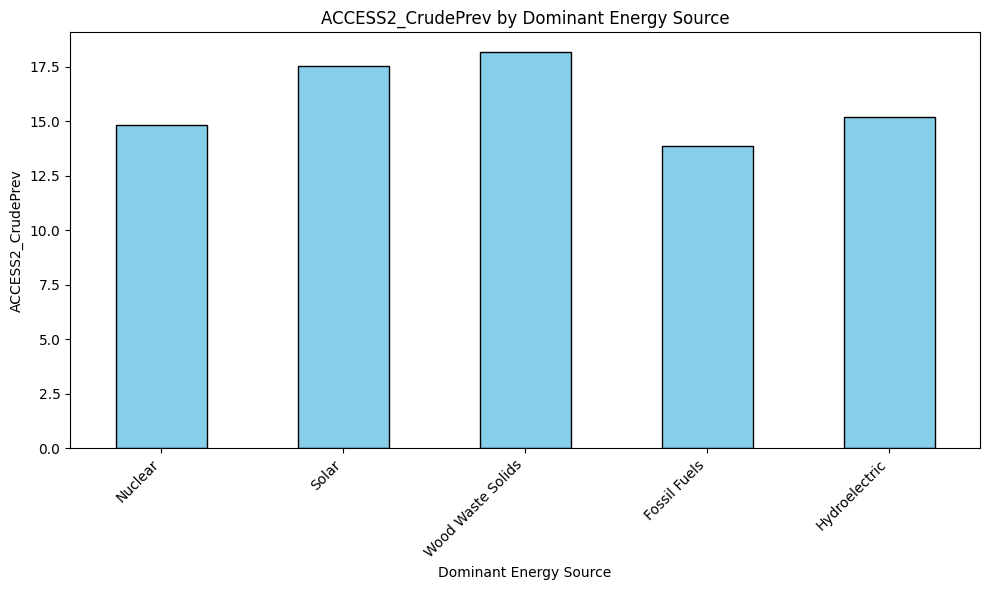

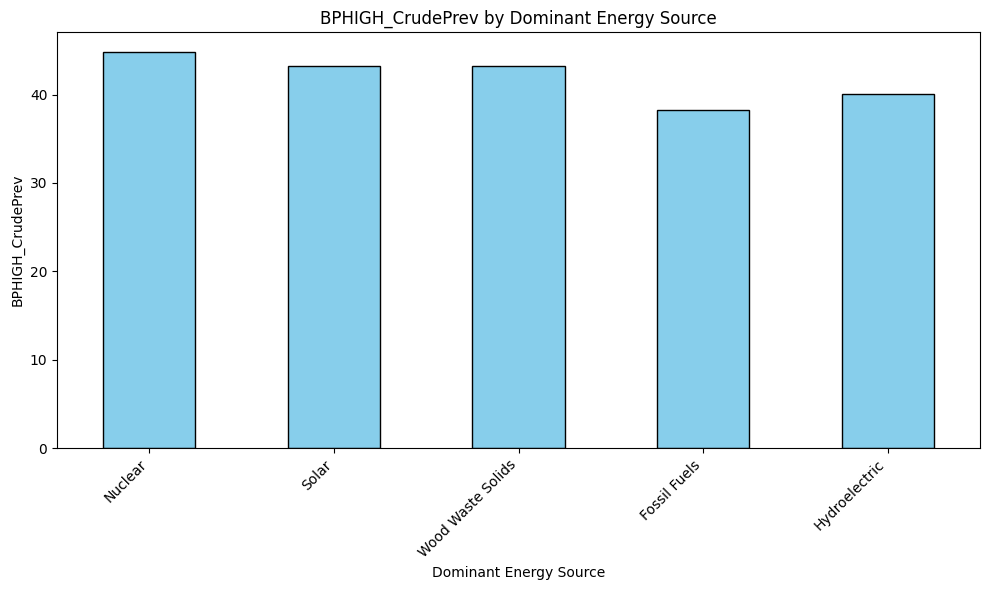

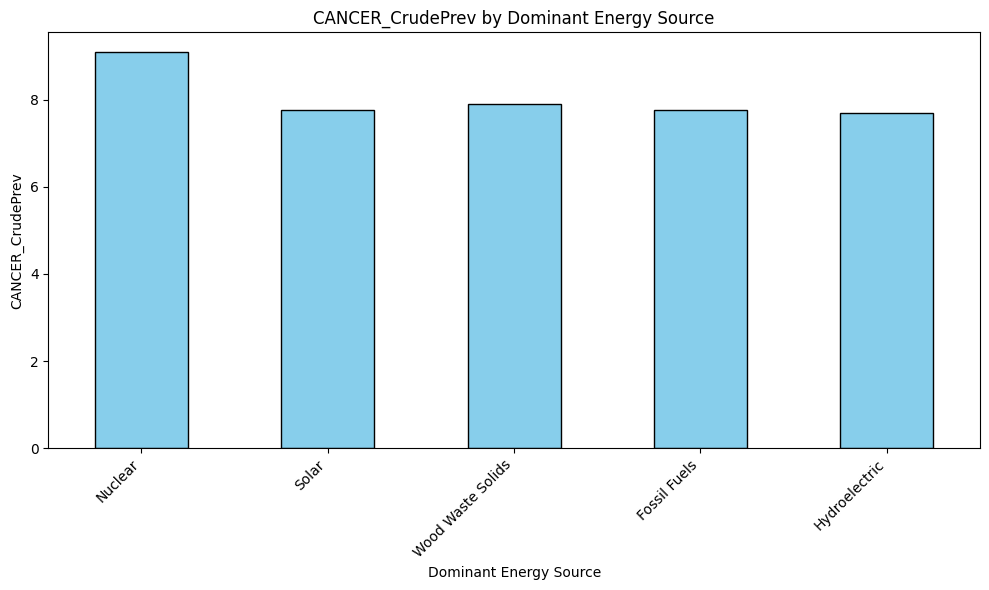

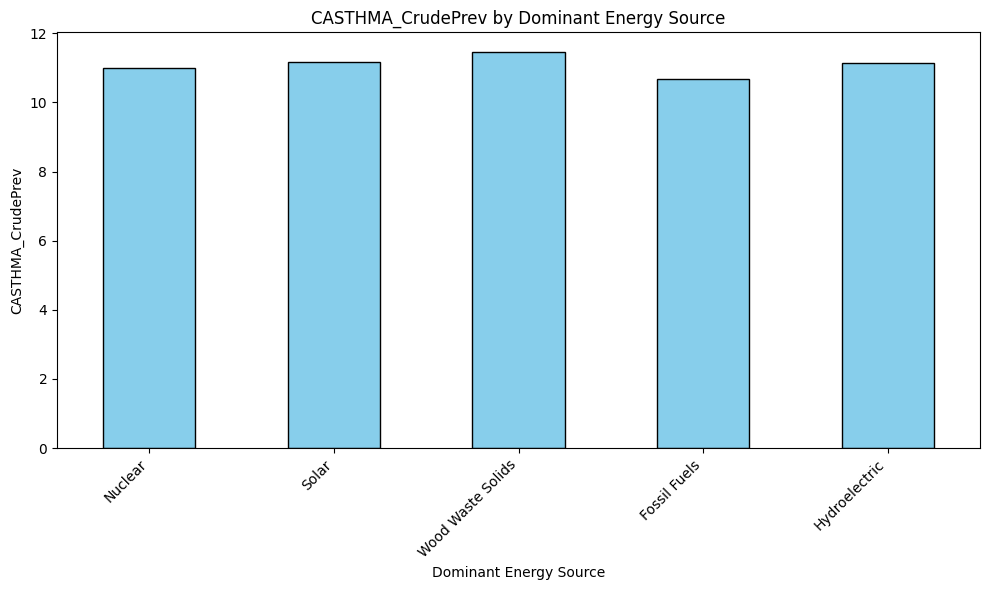

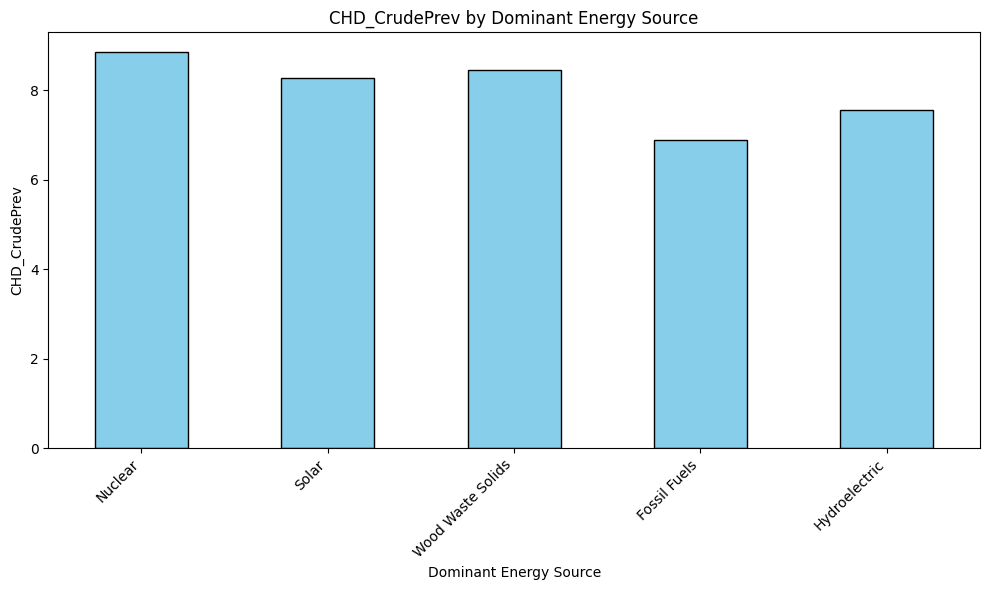

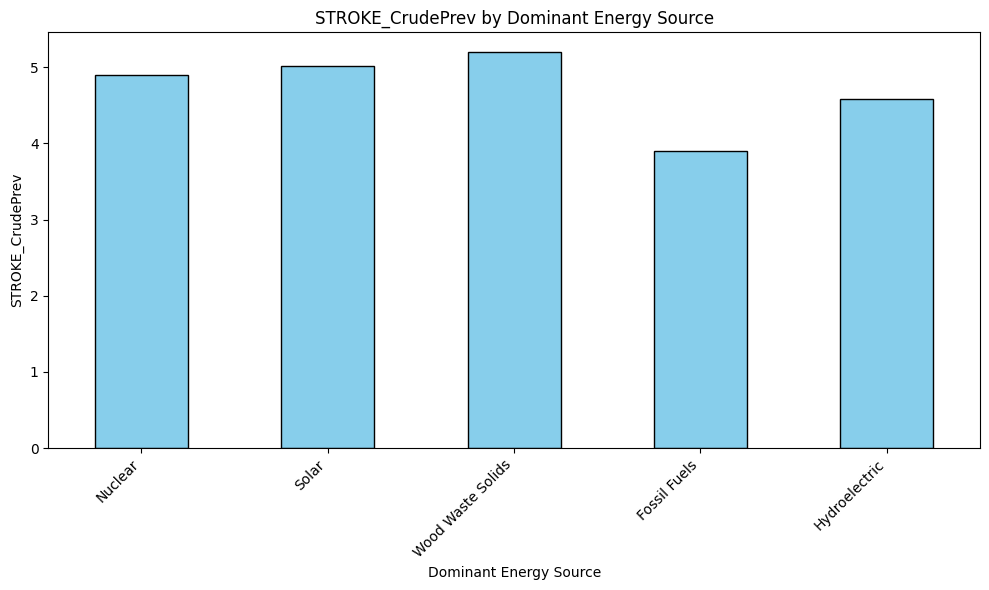

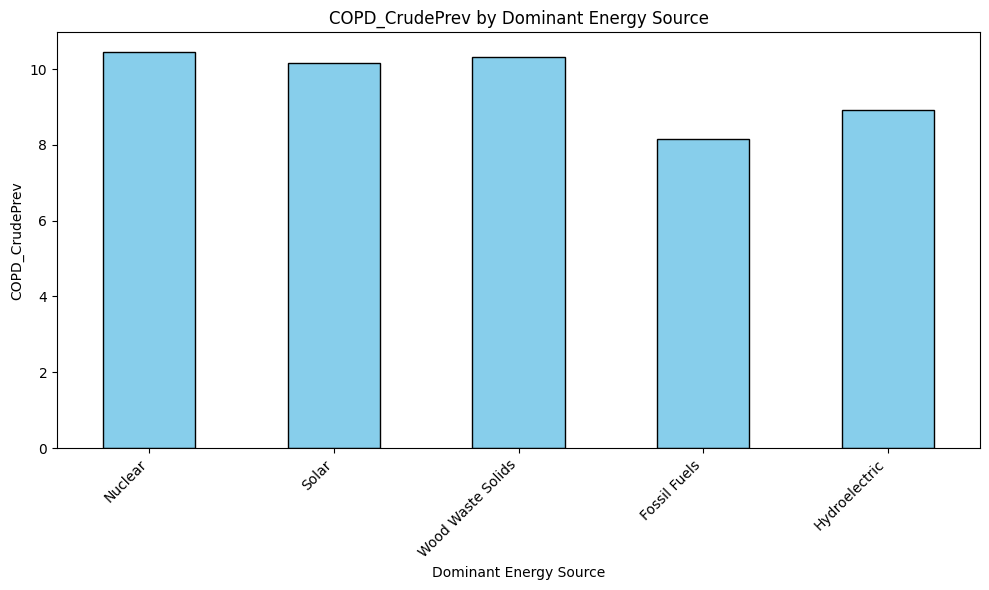

In [12]:
import matplotlib.pyplot as plt

# Iterate through each health condition and create a bar chart
for health_condition in average_health_prevalence.index:
    plt.figure(figsize=(10, 6))
    average_health_prevalence.loc[health_condition].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{health_condition} by Dominant Energy Source')
    plt.xlabel('Dominant Energy Source')
    plt.ylabel(health_condition)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [13]:
# Define bins for the 'Total' column
bins = [0, 10000, 50000, 100000, 500000, 1000000, plants_df['Total'].max()]
labels = ['0-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M+']

# Create a new column for the bins
plants_df['Total_Bin'] = pd.cut(plants_df['Total'], bins=bins, labels=labels, include_lowest=True)

# Group by the 'Total_Bin' column and calculate the average for the specified health columns
average_by_total_bin = plants_df.groupby('Total_Bin')[health_columns_to_average].mean()

# Display the result
print(average_by_total_bin)

           ACCESS2_CrudePrev  BPHIGH_CrudePrev  CANCER_CrudePrev  \
Total_Bin                                                          
0-10k              16.035714         41.954762          7.767857   
10k-50k            16.634375         43.028125          8.375000   
50k-100k           17.057895         36.189474          6.884211   
100k-500k          17.586207         44.993103          8.317241   
500k-1M            17.187500         43.675000          8.687500   
1M+                13.092308         36.730769          8.023077   

           CASTHMA_CrudePrev  CHD_CrudePrev  STROKE_CrudePrev  COPD_CrudePrev  
Total_Bin                                                                      
0-10k              10.960714       7.747619          4.645238        9.216667  
10k-50k            10.871875       8.331250          4.900000        9.846875  
50k-100k           10.515789       6.715789          3.868421        8.236842  
100k-500k          11.434483       8.825862          5.

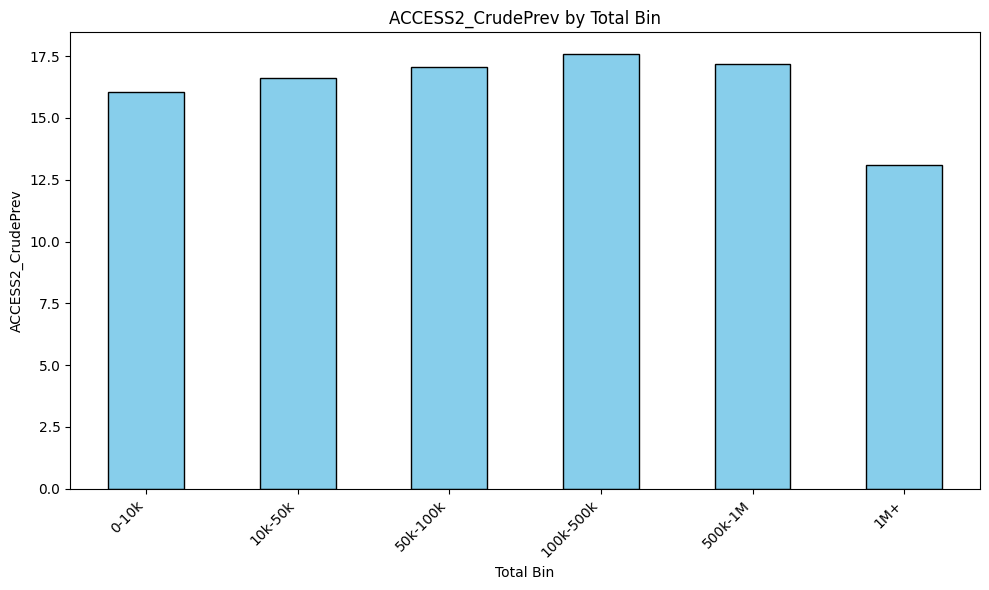

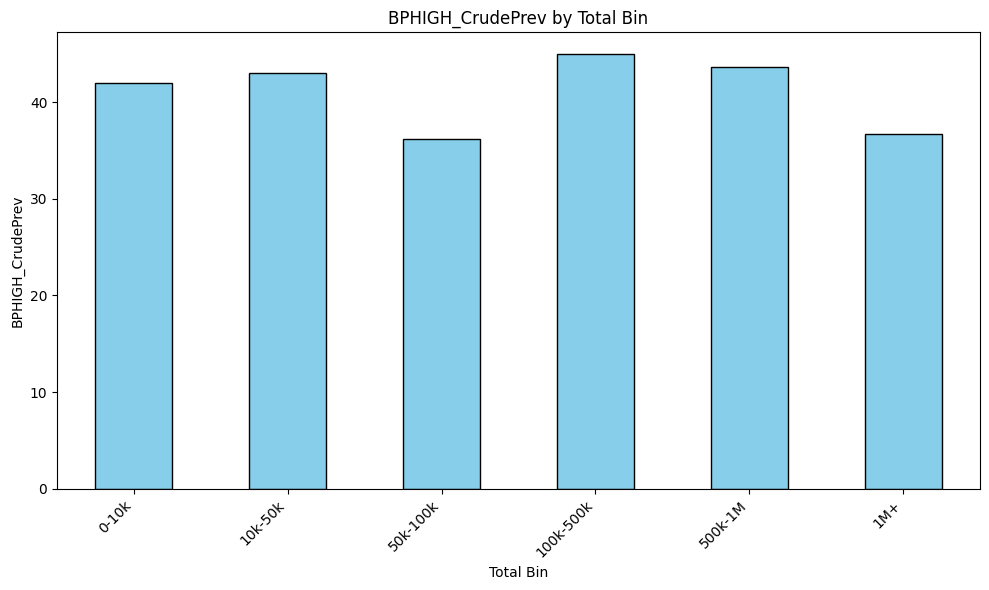

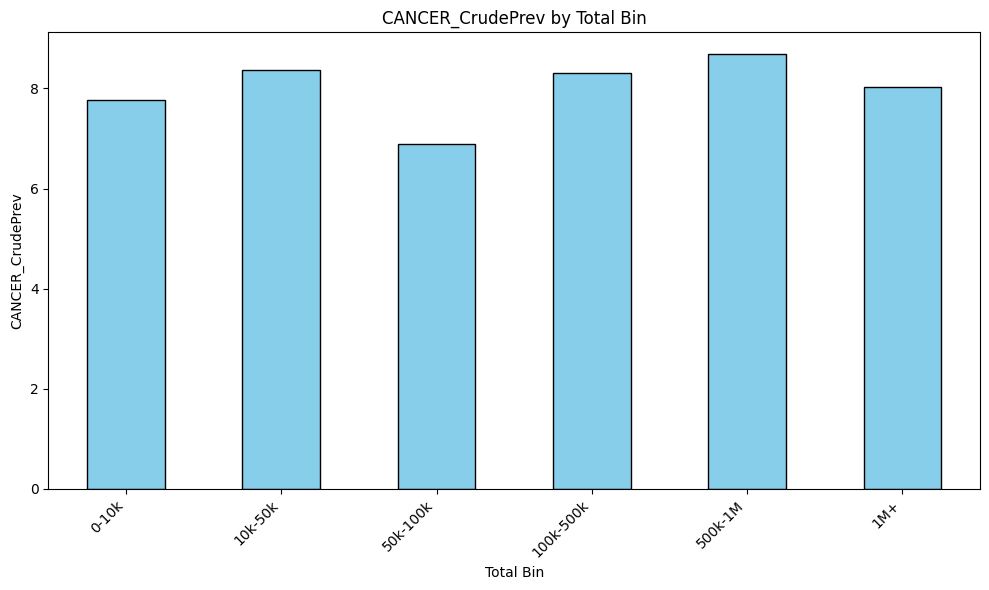

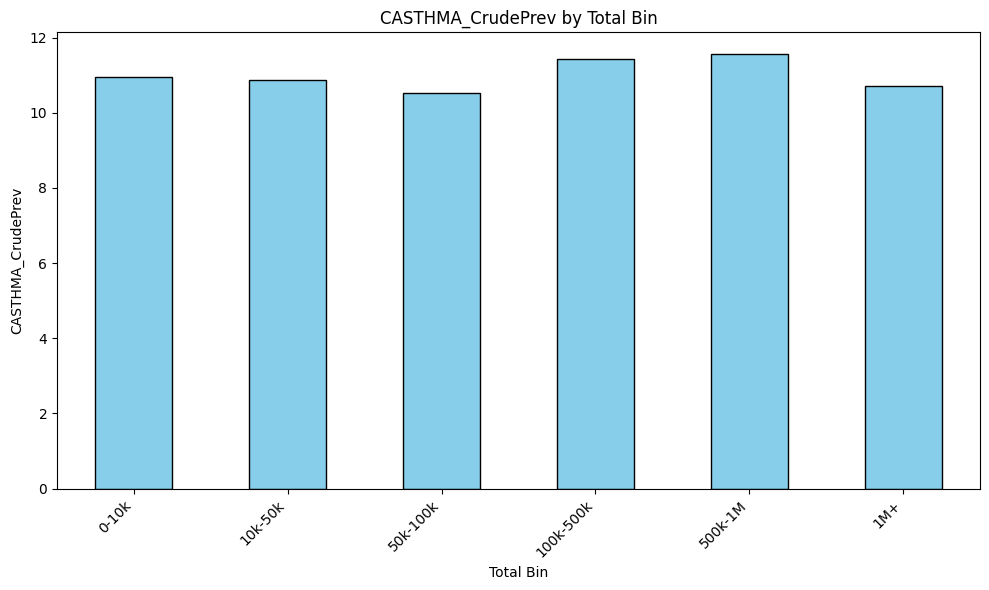

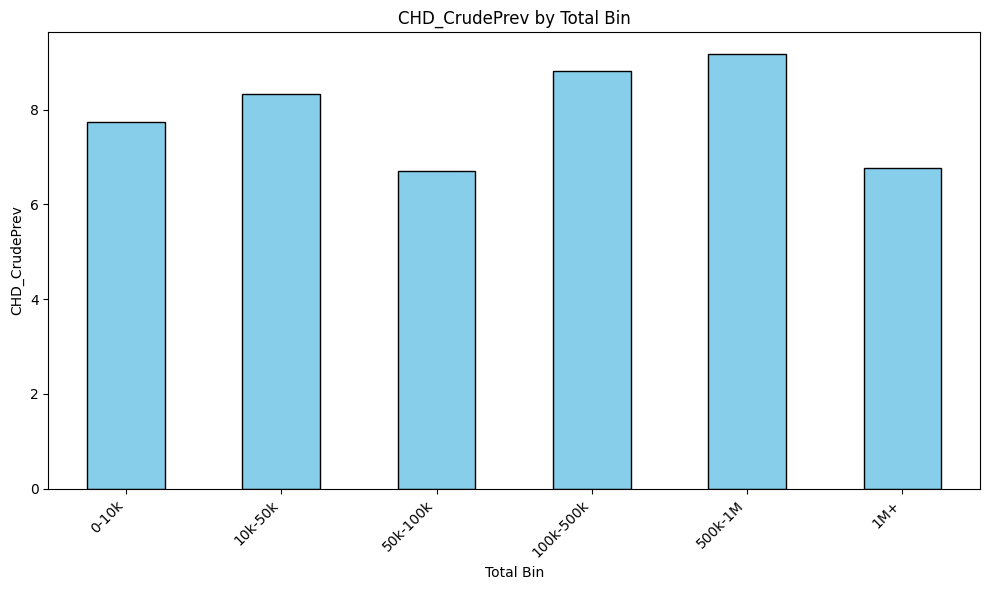

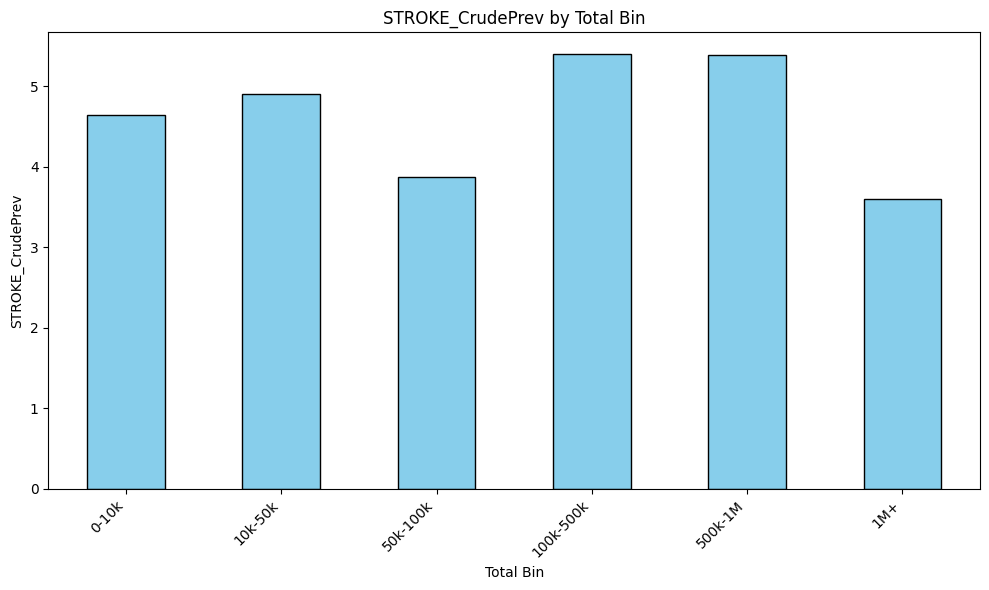

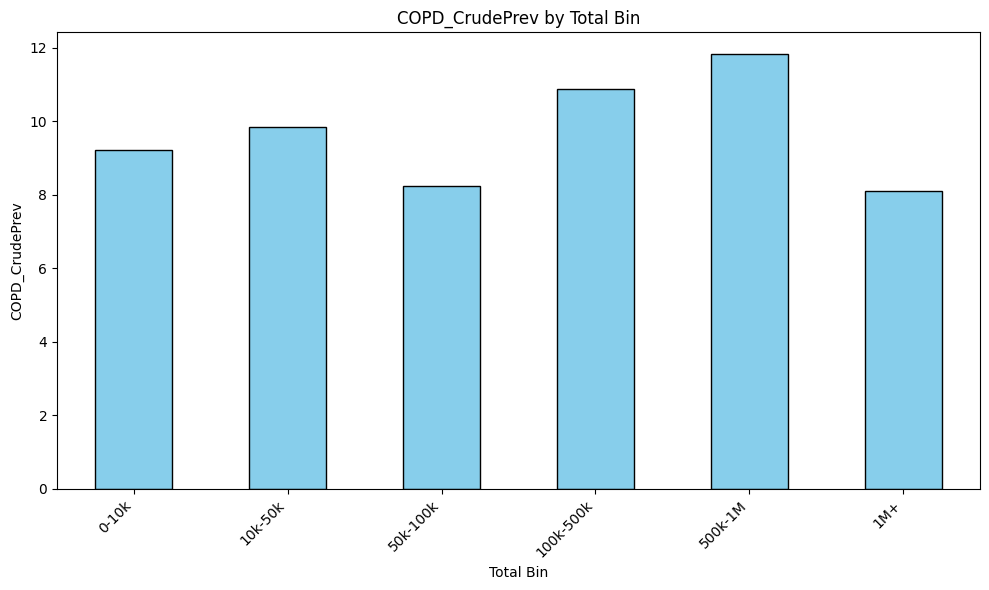

In [14]:
import matplotlib.pyplot as plt

# Iterate through each health condition and create a bar chart
for health_condition in average_by_total_bin.columns:
    plt.figure(figsize=(10, 6))
    average_by_total_bin[health_condition].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{health_condition} by Total Bin')
    plt.xlabel('Total Bin')
    plt.ylabel(health_condition)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Correlation between energy characteristics and health conditions:
                              ACCESS2_CrudePrev  BPHIGH_CrudePrev  \
Coal                                  -0.058148         -0.026607   
Distillate Fuel Oil                   -0.080582         -0.059524   
Hydroelectric Conventional            -0.061996          0.078428   
Hydroelectric Pumped Storage          -0.072009         -0.175514   
Municiapl Landfill Gas                -0.057732         -0.070878   
Natural Gas                           -0.126504         -0.151671   
Nuclear                               -0.044152          0.034289   
Other                                  0.005458          0.026903   
Petroleum Coke                        -0.082341         -0.061875   
Residual Fuel Oil                     -0.041613         -0.014516   
Solar                                  0.188329          0.233250   
Waste Oil and Other Oils               0.122075          0.028689   
Wood Waste Solids                    

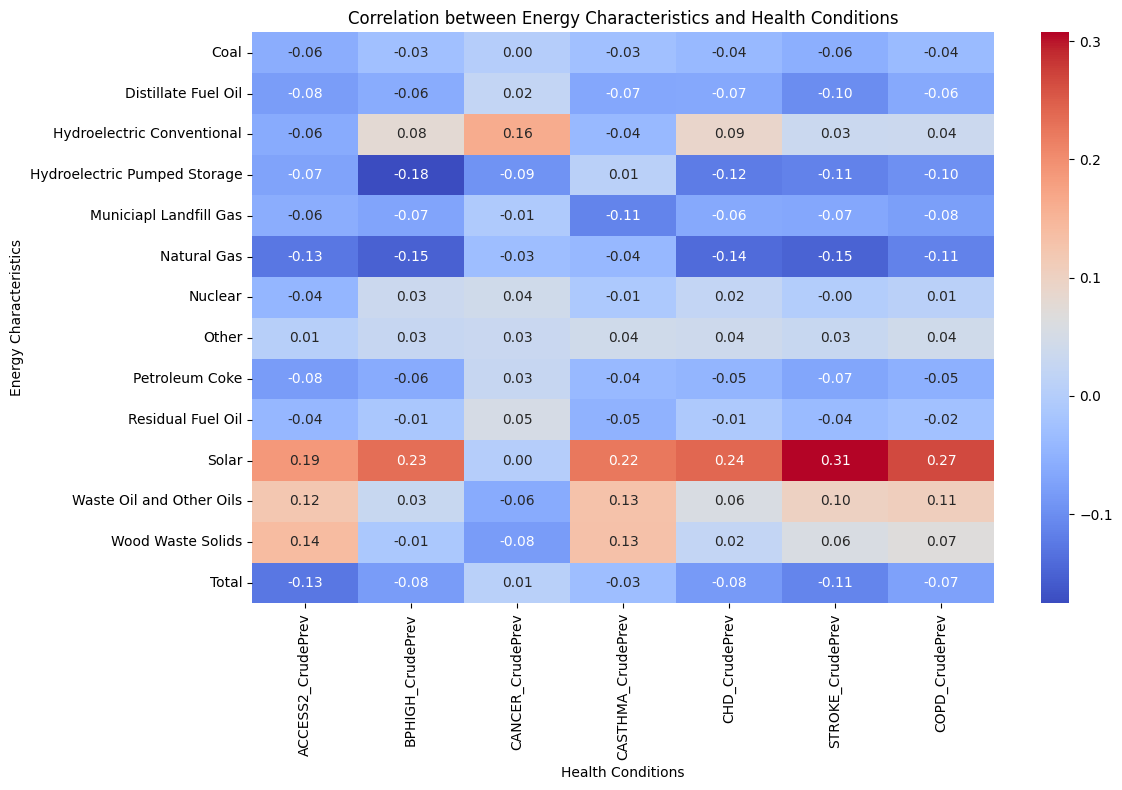

In [15]:
# Correlation analysis between energy generation characteristics and health conditions
energy_columns = ['Coal', 'Distillate Fuel Oil', 'Hydroelectric Conventional', 
                  'Hydroelectric Pumped Storage', 'Municiapl Landfill Gas', 
                  'Natural Gas', 'Nuclear', 'Other', 'Petroleum Coke', 
                  'Residual Fuel Oil', 'Solar', 'Waste Oil and Other Oils', 
                  'Wood Waste Solids', 'Total']

# Calculate correlations between energy columns and health conditions
correlation_results = plants_df[energy_columns + health_columns_to_average].corr()

# Extract correlations of energy columns with health conditions
correlation_with_health = correlation_results.loc[energy_columns, health_columns_to_average]

# Display the correlation results
print("Correlation between energy characteristics and health conditions:")
print(correlation_with_health)


# Visualize the correlation results
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlations between energy characteristics and health conditions
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_health, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation between Energy Characteristics and Health Conditions")
plt.xlabel("Health Conditions")
plt.ylabel("Energy Characteristics")
plt.tight_layout()
plt.show()



C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


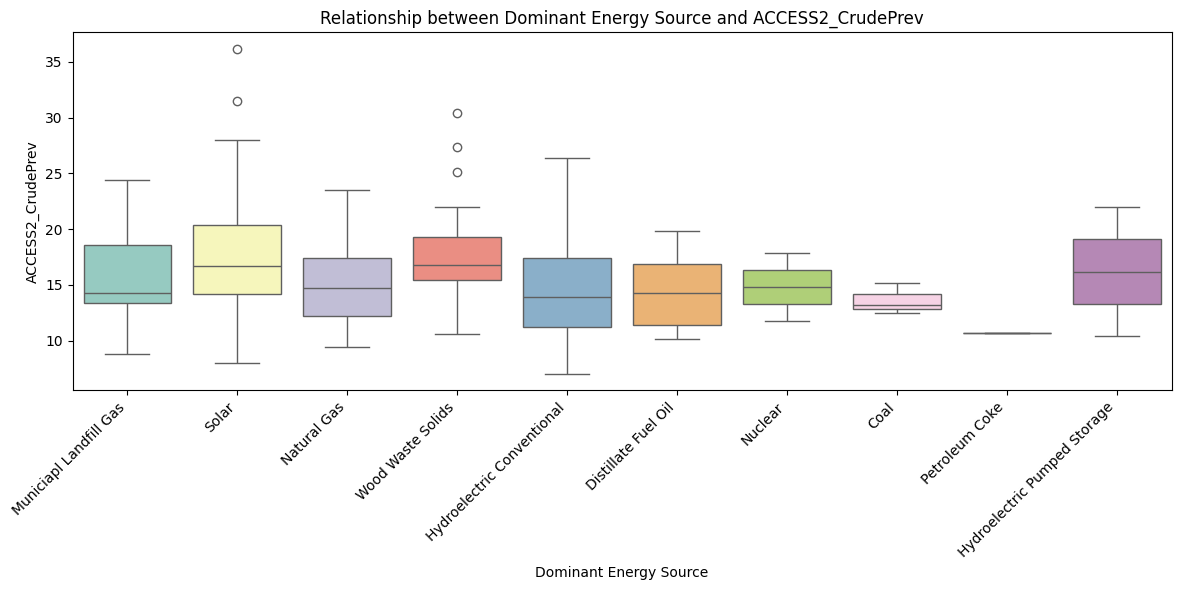

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


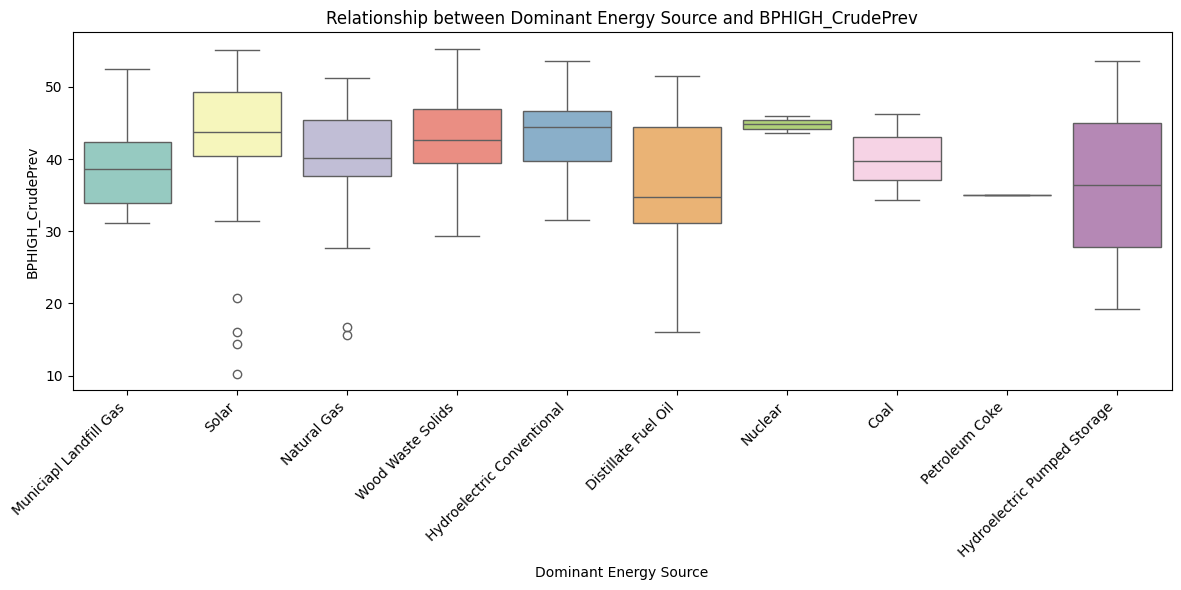

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


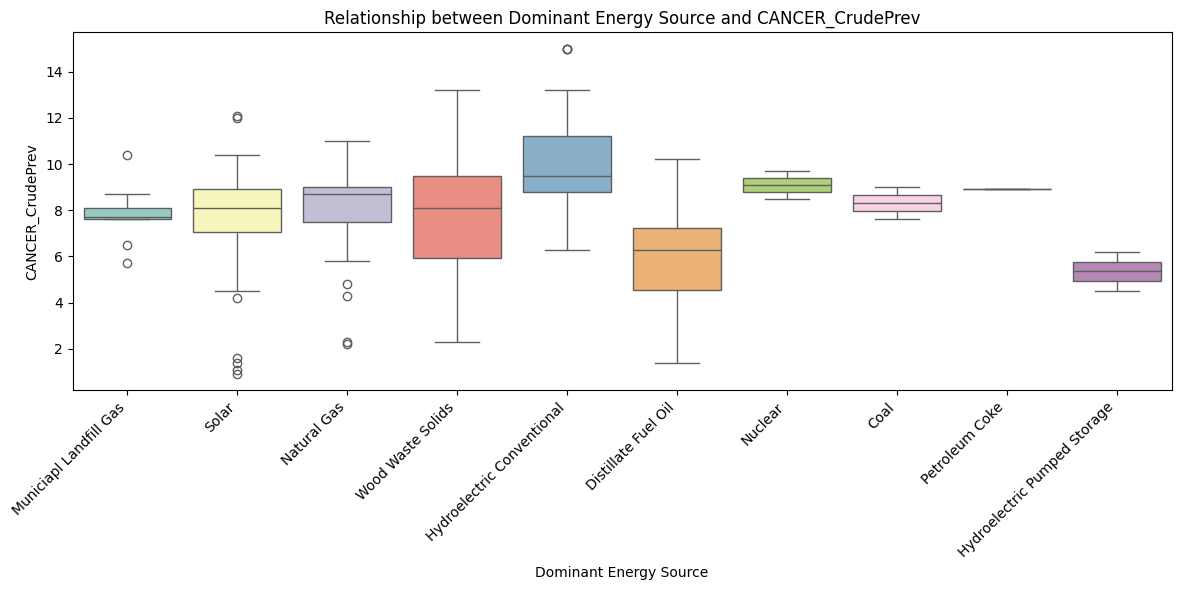

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


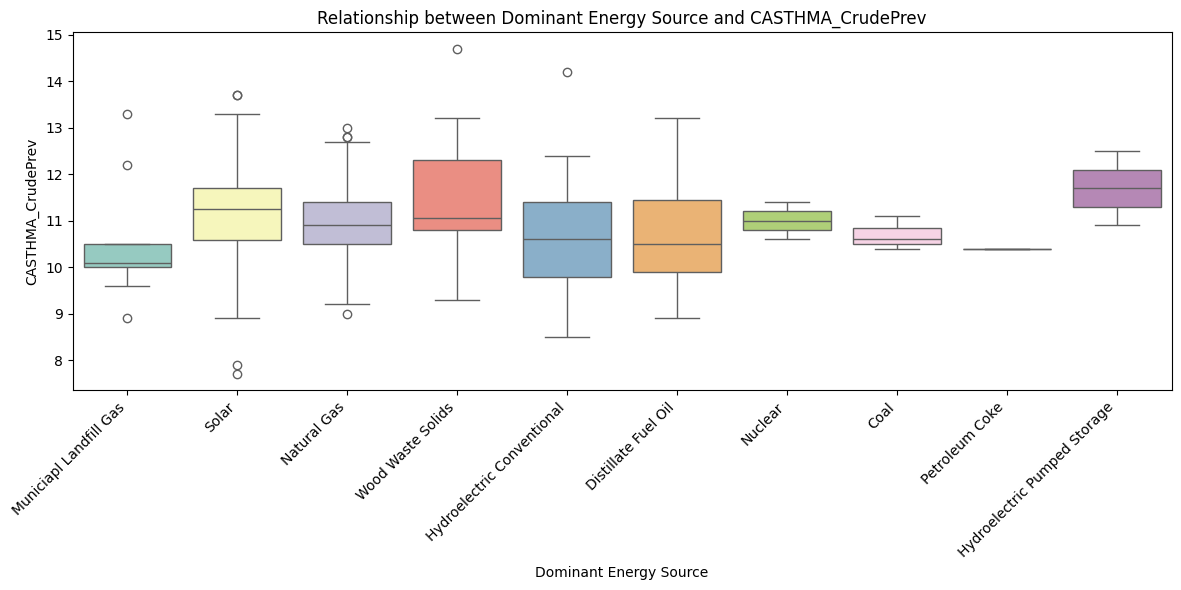

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


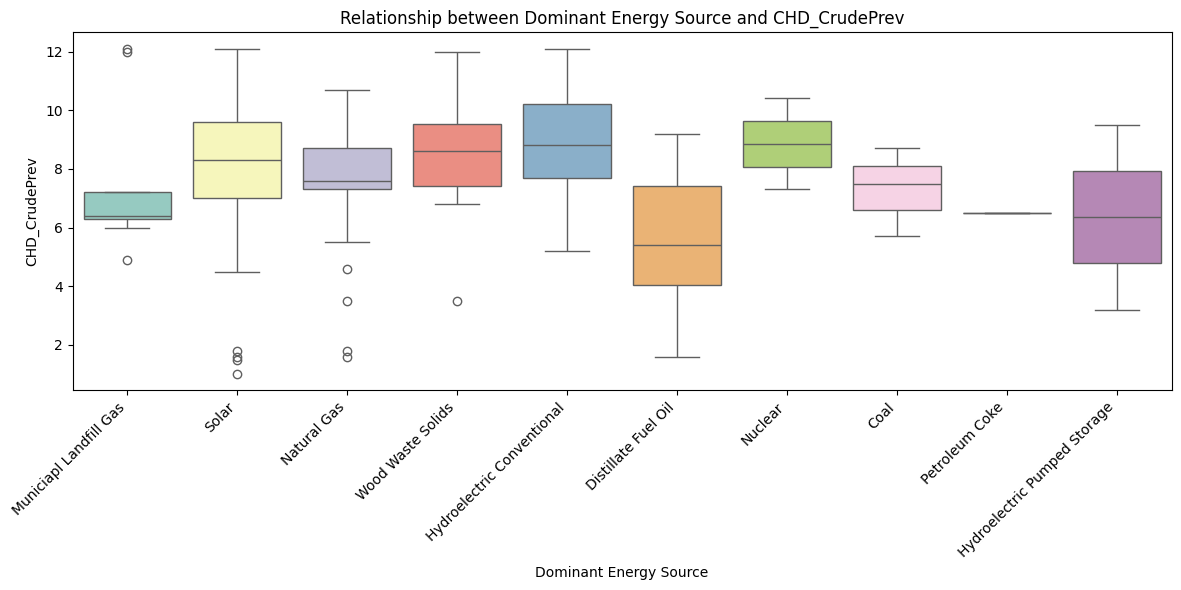

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


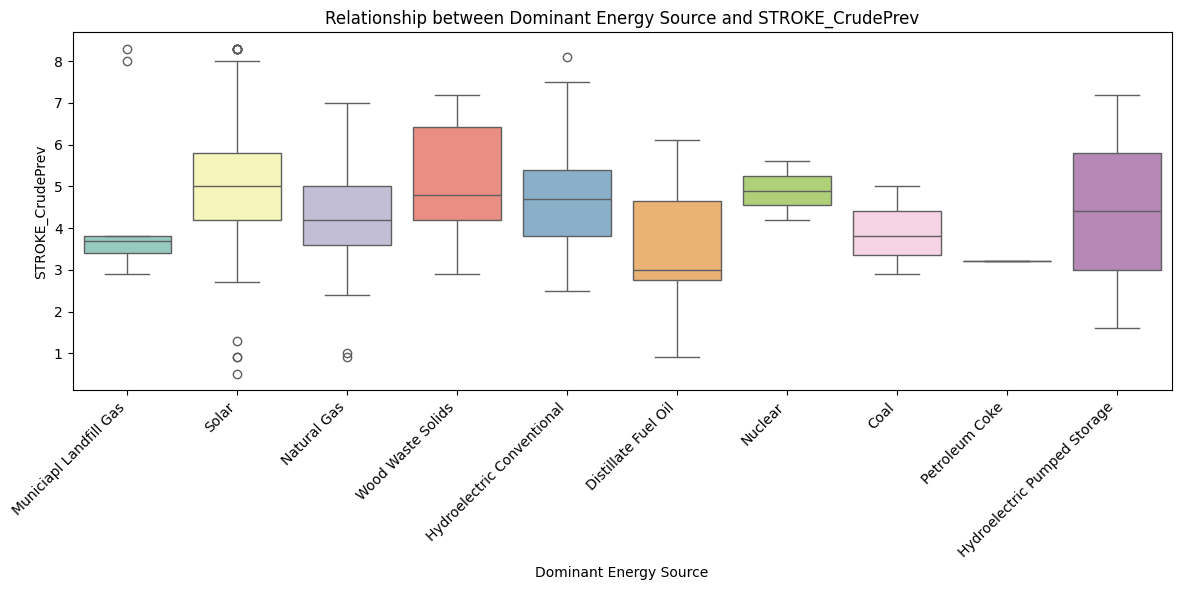

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3375447453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')


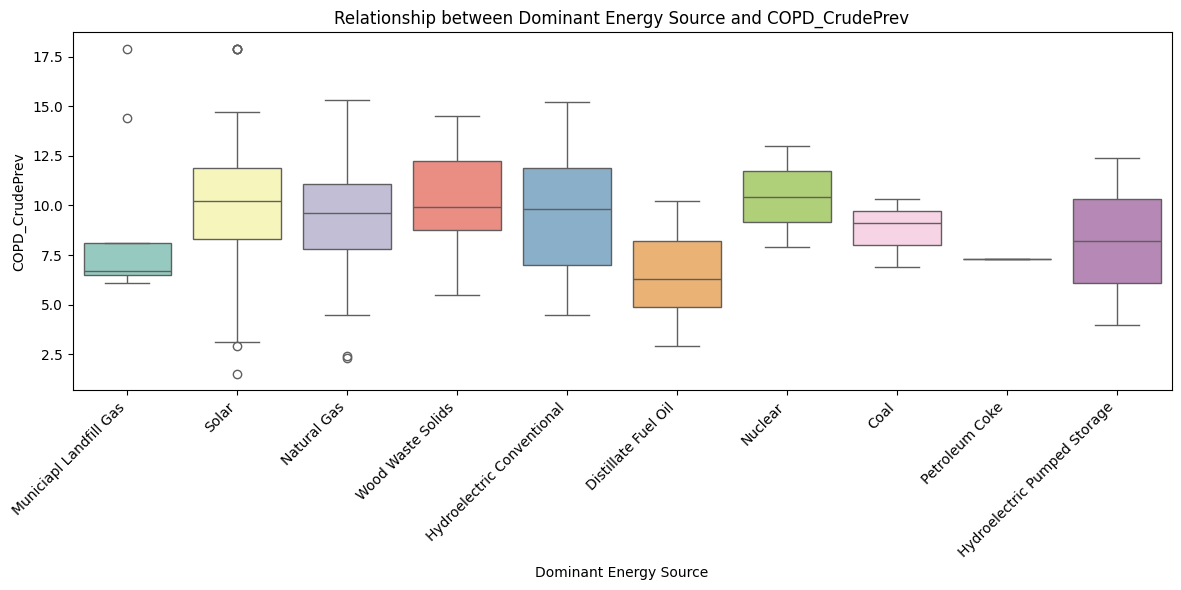

In [17]:
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Iterate through each health condition
for health_condition in health_columns_to_average:
   
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='dominant', y=health_condition, data=plants_df, palette='Set3')
    plt.title(f"Relationship between Dominant Energy Source and {health_condition}")
    plt.xlabel("Dominant Energy Source")
    plt.ylabel(health_condition)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [1]:
import pandas as pd

In [2]:
egrid_22 = pd.read_excel(r"C:\Users\kaavy\OneDrive\Documents\Sci4GA Internship\EGRID Data\egrid_22_ga_cleaned.xlsx")

In [19]:
egrid_22.columns

Index(['Plant name', 'Plant state abbreviation',
       'DOE/EIA ORIS plant or facility code', 'Plant operator name',
       'Plant operator ID', 'Utility service territory name',
       'Utility service territory ID', 'Balancing Authority Name',
       'Balancing Authority Code', 'NERC region acronym',
       'eGRID subregion acronym', 'eGRID subregion name',
       'Plant FIPS county code', 'Plant county name', 'Plant latitude',
       'Plant longitude', 'Plant primary fuel',
       'Plant primary coal/oil/gas/ other fossil fuel category',
       'Plant annual NOx emissions (tons)',
       'Plant ozone season NOx emissions (tons)',
       'Plant annual SO2 emissions (tons)',
       'Plant annual CO2 emissions (tons)',
       'Plant annual coal net generation (MWh)',
       'Plant annual oil net generation (MWh)',
       'Plant annual gas net generation (MWh)',
       'Plant annual nuclear net generation (MWh)',
       'Plant annual hydro net generation (MWh)',
       'Plant annual bi

In [20]:
egrid_22.head()

,Plant name,Plant state abbreviation,DOE/EIA ORIS plant or facility code,Plant operator name,Plant operator ID,Utility service territory name,Utility service territory ID,Balancing Authority Name,Balancing Authority Code,NERC region acronym,...,Plant nuclear generation percent (resource mix),Plant hydro generation percent (resource mix),Plant biomass generation percent (resource mix),Plant wind generation percent (resource mix),Plant solar generation percent (resource mix),Plant geothermal generation percent (resource mix),Plant other fossil generation percent (resource mix),Plant other unknown / purchased fuel generation percent (resource mix),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix)
0,191 Peachtree Tower,GA,54818,Georgia Power Co,7140,"Banyan St./GAP 191 Peachtree Owner, LLC",21260,"Southern Company Services, Inc. - Trans",SOCO,SERC,...,0,0,0.000000,0,0,0,0.0,0.0,0.000000,0.000000
1,ADS Renewable Energy-Wolf Creek LLC,GA,60184,Oconee Electric Member Corp,13962,"ADS Renewable Energy- Wolf Creek, LLC",59946,"Southern Company Services, Inc. - Trans",SOCO,SERC,...,0,0,1.000000,0,0,0,0.0,0.0,0.000000,1.000000
2,AL Sandersville Energy Facility,GA,55672,Georgia Power Co,7140,"SEPG Operating Services, LLC ALS",59417,"Southern Company Services, Inc. - Trans",SOCO,SERC,...,0,0,0.000000,0,0,0,0.0,0.0,1.000000,0.000000
3,Albany Green Energy LLC,GA,60340,Georgia Power Co,7140,"Albany Green Energy, LLC",60130,"Southern Company Services, Inc. - Trans",SOCO,SERC,...,0,0,0.995938,0,0,0,0.0,0.0,0.004062,0.995938
4,Allatoona,GA,760,Georgia Power Co,7140,USCE-Mobile District,27813,"Southern Company Services, Inc. - Trans",SOCO,SERC,...,0,1,0.000000,0,0,0,0.0,0.0,0.000000,1.000000


In [21]:
# Merge egrid_22 with plants_df on plant names
merged_df2 = pd.merge(plants_df, egrid_22, left_on='plantName', right_on='Plant name', how='inner')

# Display the merged dataframe
merged_df2.head()

,plantName,Year,Latitude,Longitude,Coal,Distillate Fuel Oil,Hydroelectric Conventional,Hydroelectric Pumped Storage,Municiapl Landfill Gas,Natural Gas,...,Plant nuclear generation percent (resource mix),Plant hydro generation percent (resource mix),Plant biomass generation percent (resource mix),Plant wind generation percent (resource mix),Plant solar generation percent (resource mix),Plant geothermal generation percent (resource mix),Plant other fossil generation percent (resource mix),Plant other unknown / purchased fuel generation percent (resource mix),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix)
0,ADS Renewable Energy-Wolf Creek LLC,2022,32.775500,-83.434800,0.0,0.0,0.00,0.0,20971.54,0.0,...,0,0,1.0,0,0,0,0.0,0.0,0.0,1.0
1,Richland Solar Center,2022,32.638034,-83.378924,0.0,0.0,0.00,0.0,0.00,0.0,...,0,0,0.0,0,1,0,0.0,0.0,0.0,1.0
2,Allatoona,2022,34.163700,-84.728200,0.0,0.0,134264.76,0.0,0.00,0.0,...,0,1,0.0,0,0,0,0.0,0.0,0.0,1.0
3,Apalachicola,2022,33.336320,-82.060550,0.0,0.0,0.00,0.0,0.00,0.0,...,0,0,0.0,0,1,0,0.0,0.0,0.0,1.0
4,Arnold Cochran,2022,32.399366,-83.343779,0.0,0.0,0.00,0.0,0.00,0.0,...,0,0,0.0,0,1,0,0.0,0.0,0.0,1.0


C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3802996015.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y='Emission Value', data=melted_df[melted_df['Emission Type'] == emission_type], palette='Set3')


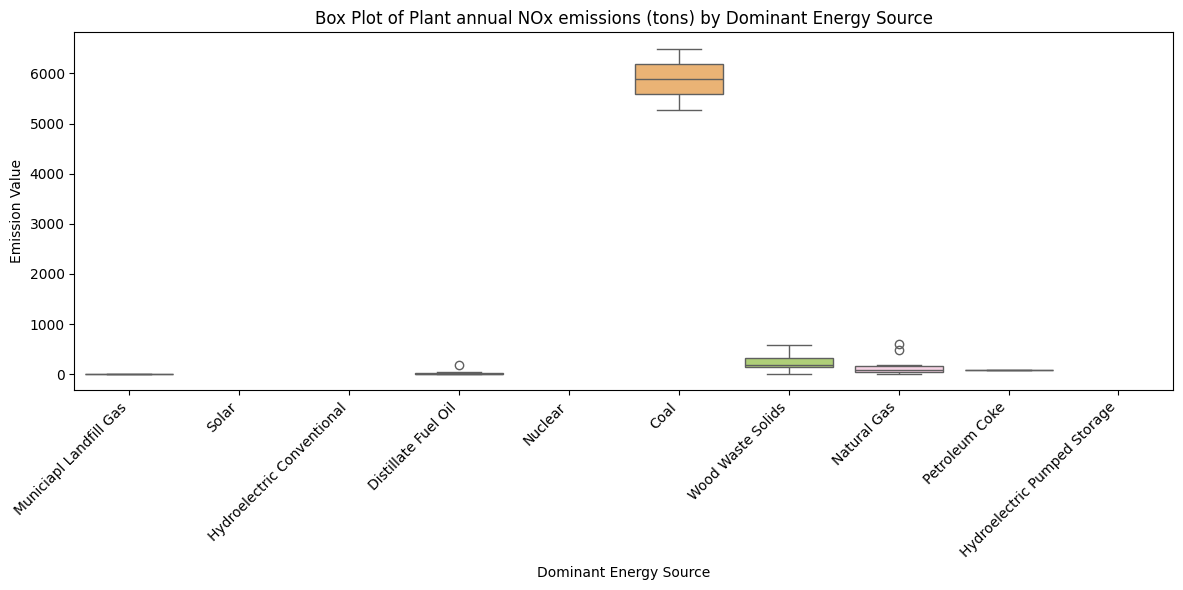

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3802996015.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y='Emission Value', data=melted_df[melted_df['Emission Type'] == emission_type], palette='Set3')


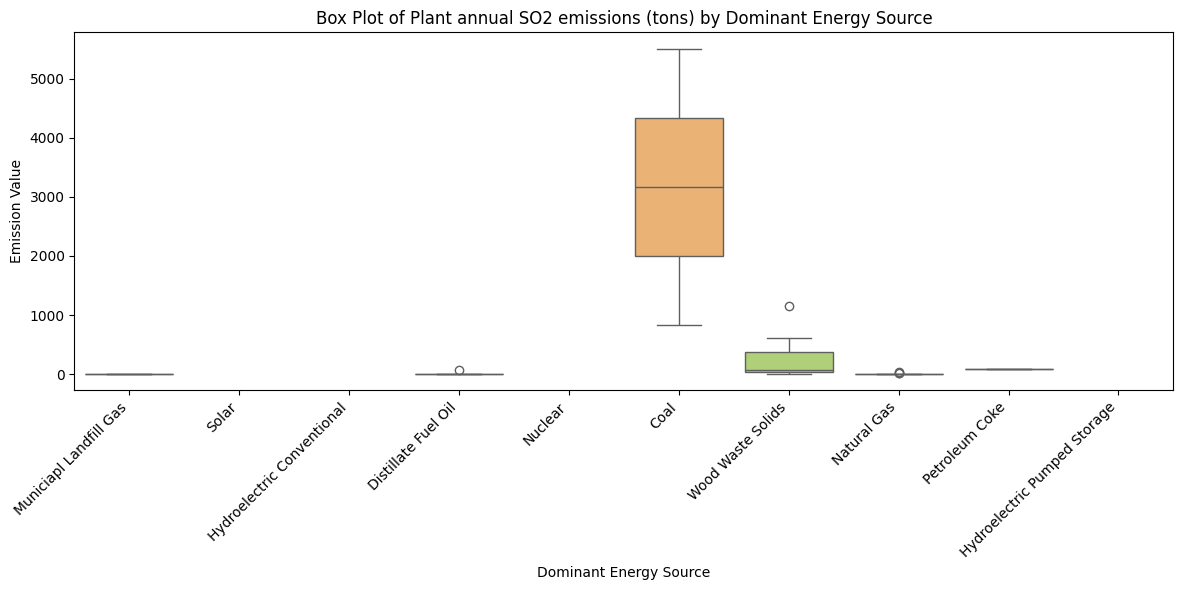

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\3802996015.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant', y='Emission Value', data=melted_df[melted_df['Emission Type'] == emission_type], palette='Set3')


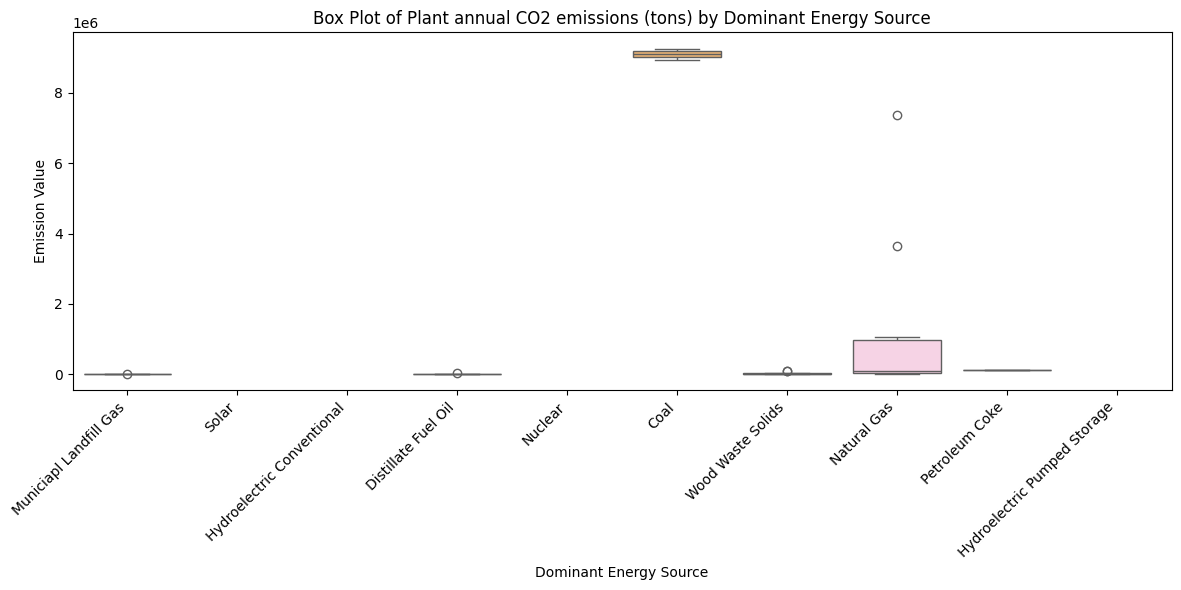

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the merged_df2 to create a long-format dataframe for emissions
emission_columns = ['Plant annual NOx emissions (tons)', 
                    'Plant annual SO2 emissions (tons)', 
                    'Plant annual CO2 emissions (tons)']

melted_df = merged_df2.melt(id_vars=['dominant'], 
                            value_vars=emission_columns, 
                            var_name='Emission Type', 
                            value_name='Emission Value')

# Filter the melted_df for the relevant emission types
emission_types = ['Plant annual NOx emissions (tons)', 
                  'Plant annual SO2 emissions (tons)', 
                  'Plant annual CO2 emissions (tons)']

# Iterate through each emission type and create a box plot
for emission_type in emission_types:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='dominant', y='Emission Value', data=melted_df[melted_df['Emission Type'] == emission_type], palette='Set3')
    plt.title(f"Box Plot of {emission_type} by Dominant Energy Source")
    plt.xlabel("Dominant Energy Source")
    plt.ylabel("Emission Value")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


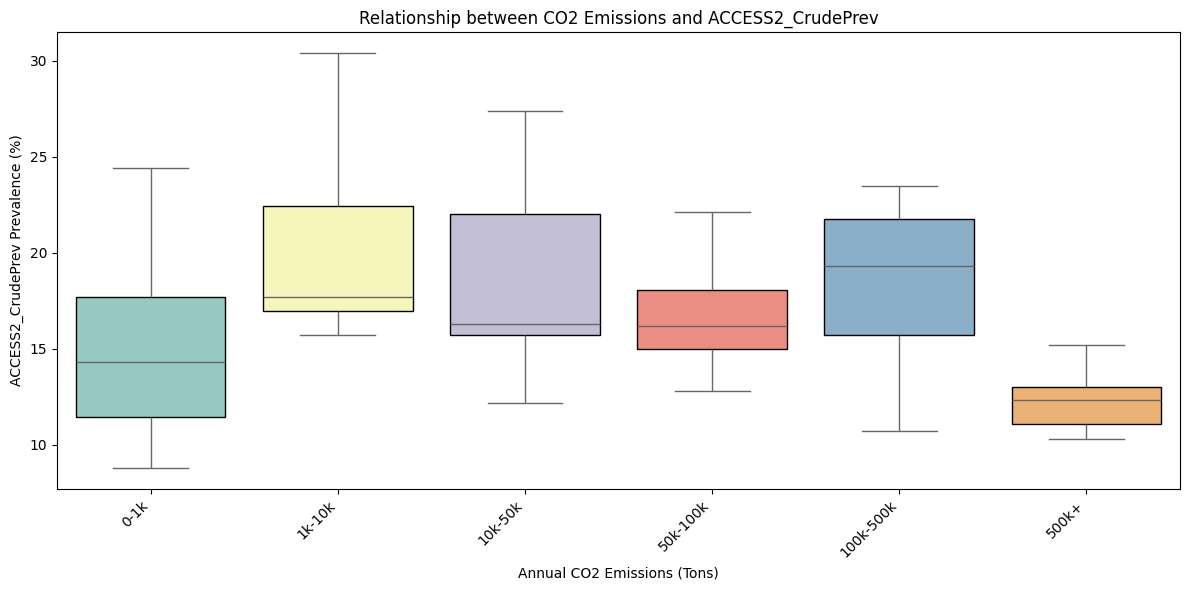

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


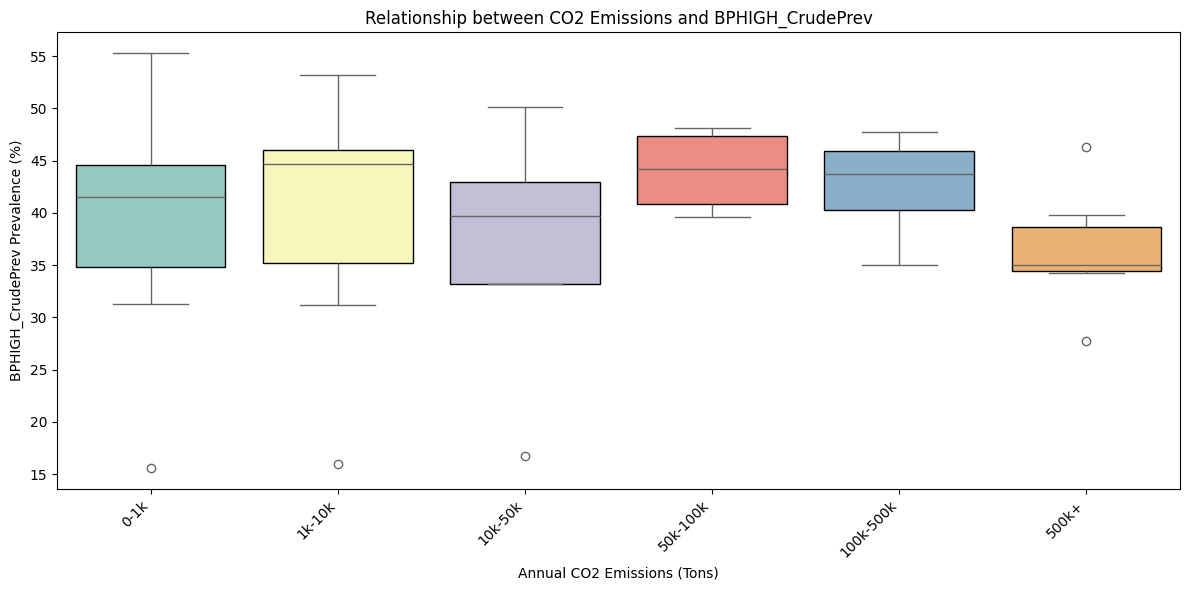

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


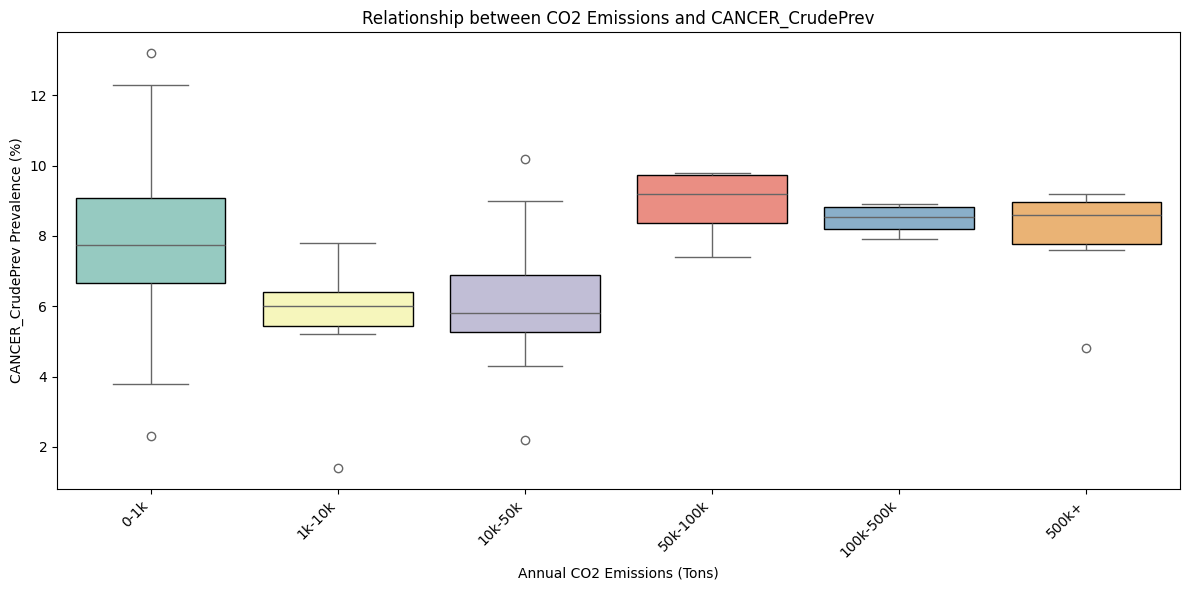

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


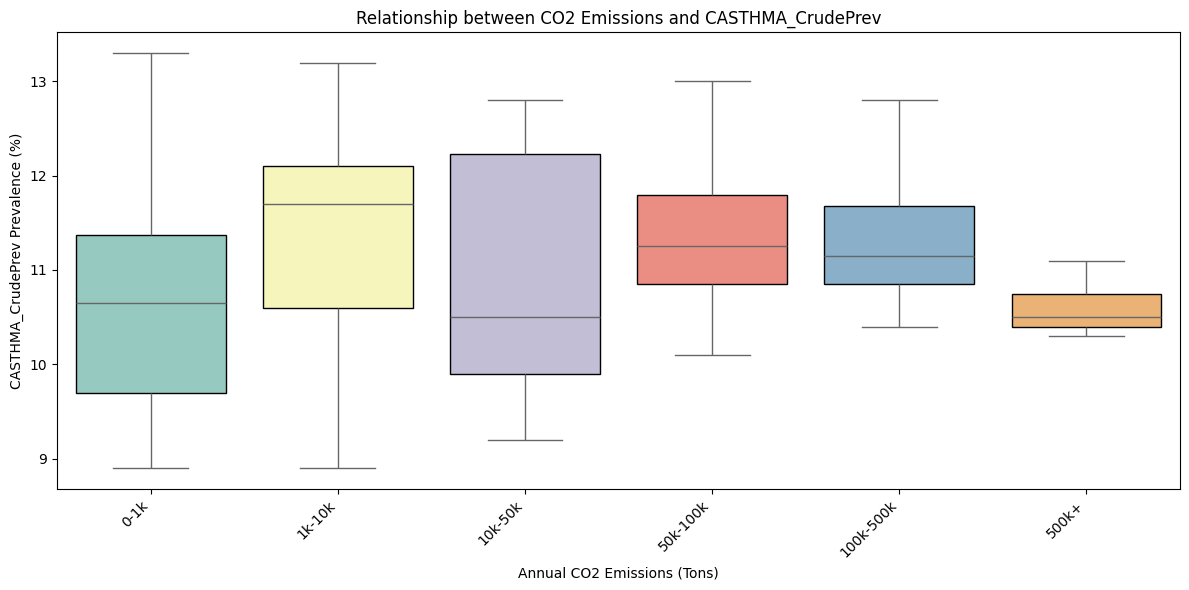

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


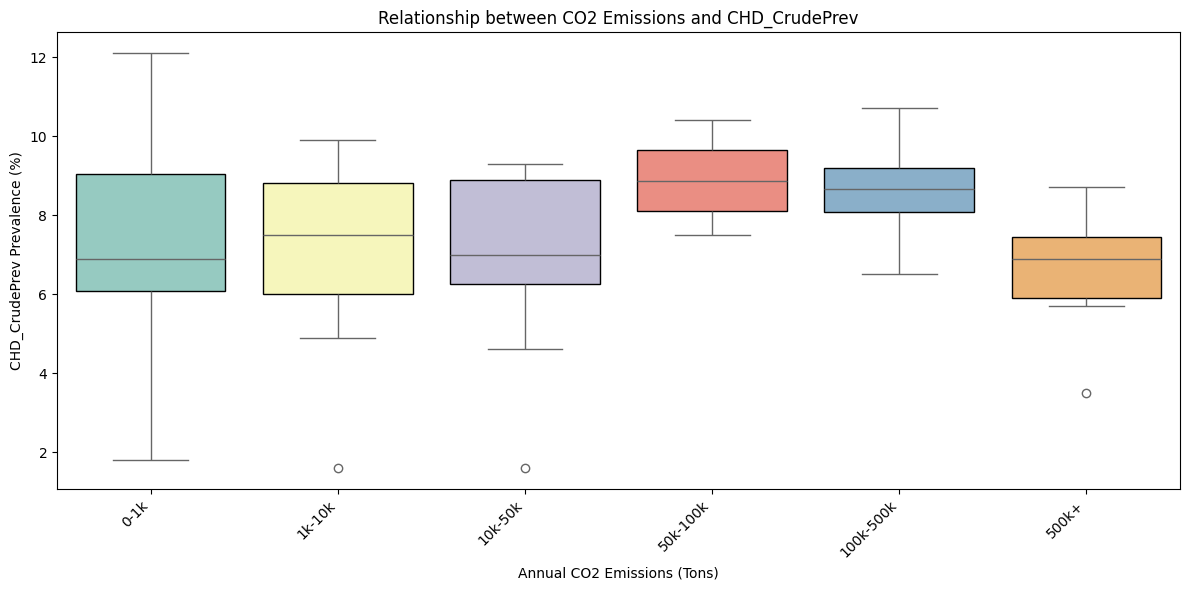

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


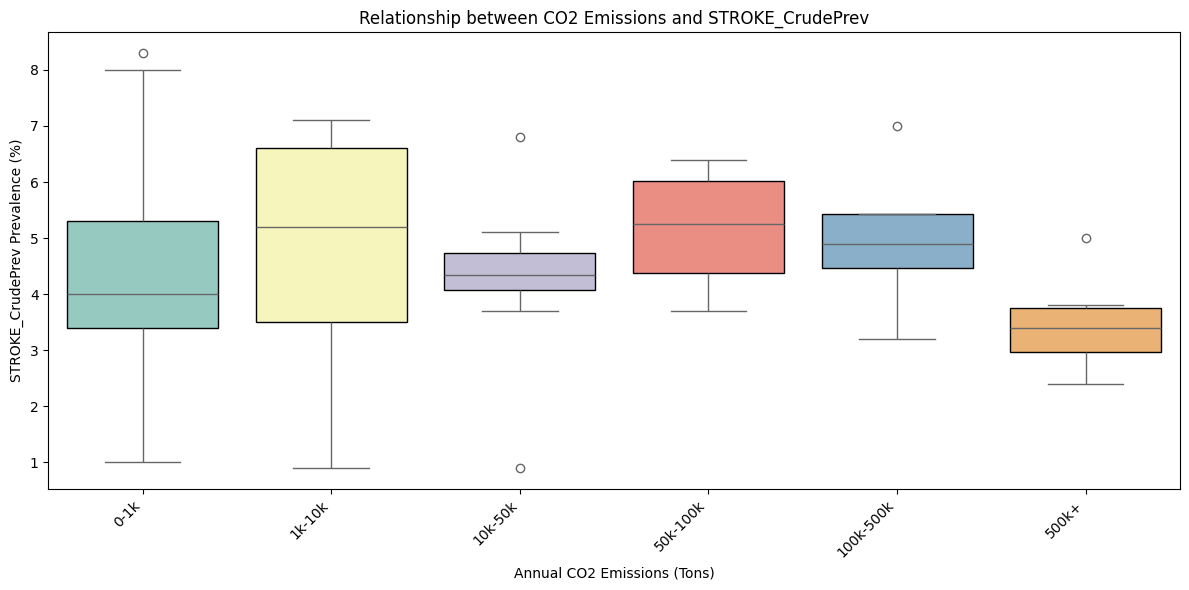

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


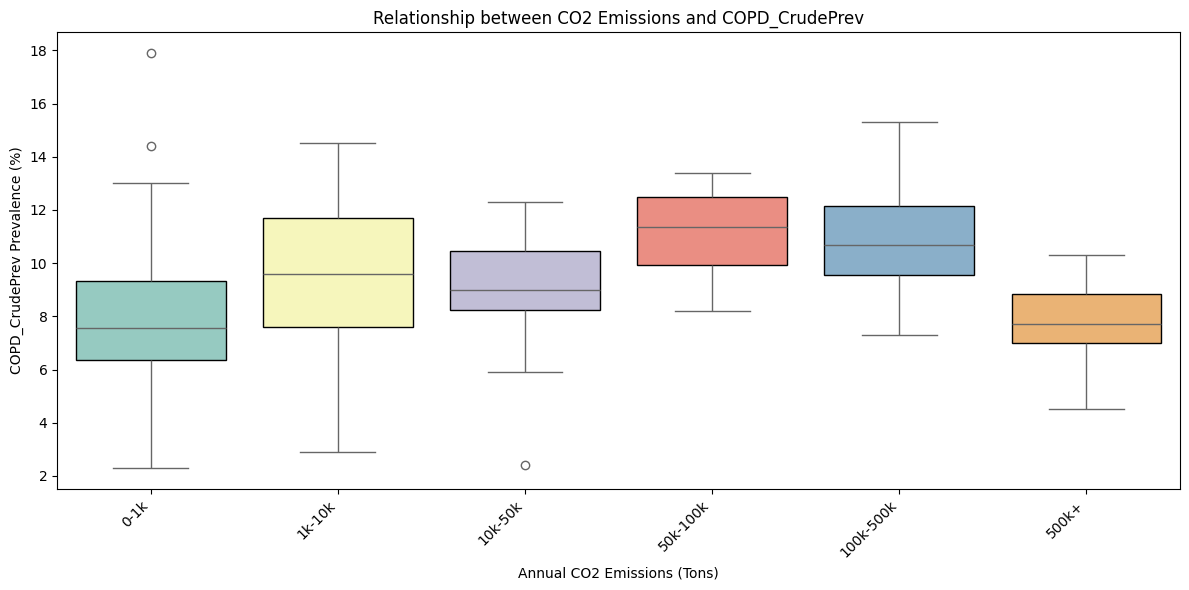

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


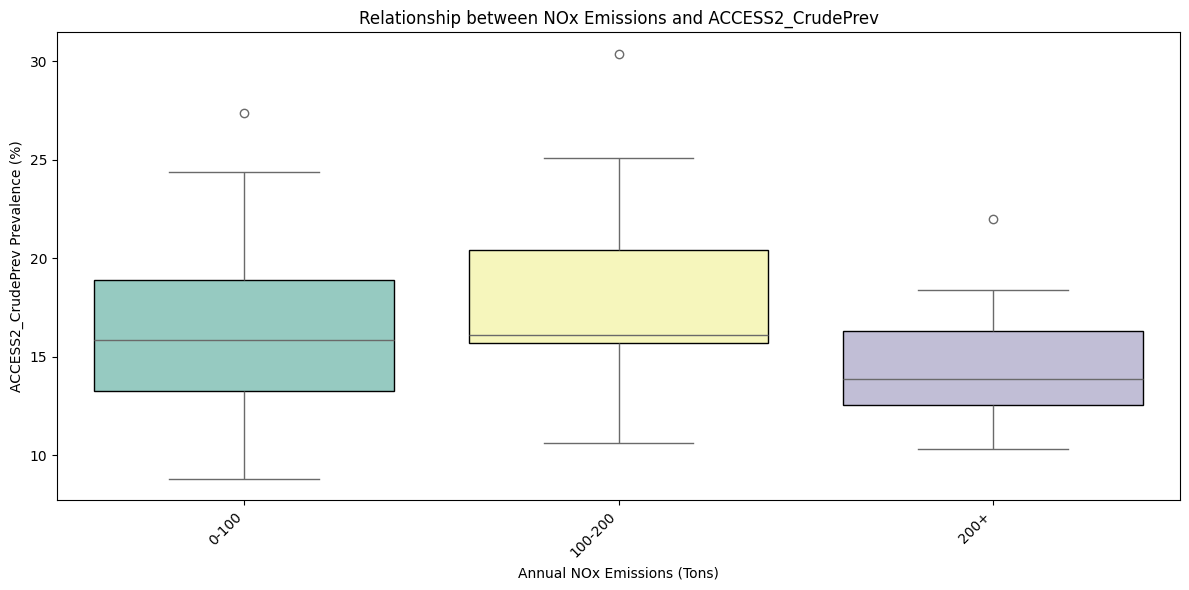

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


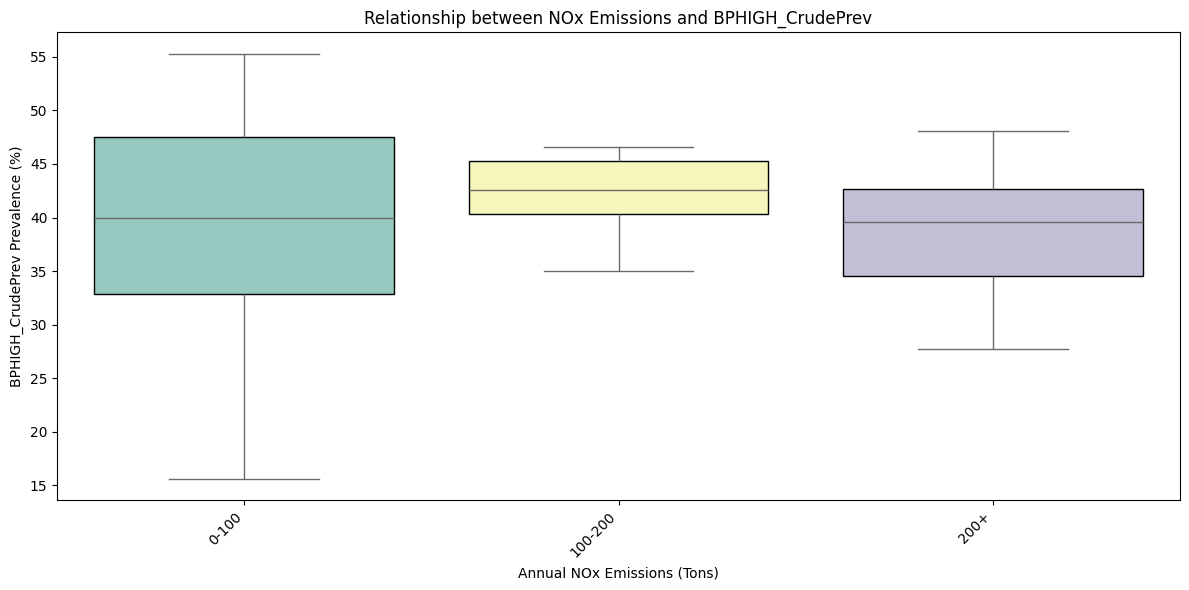

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


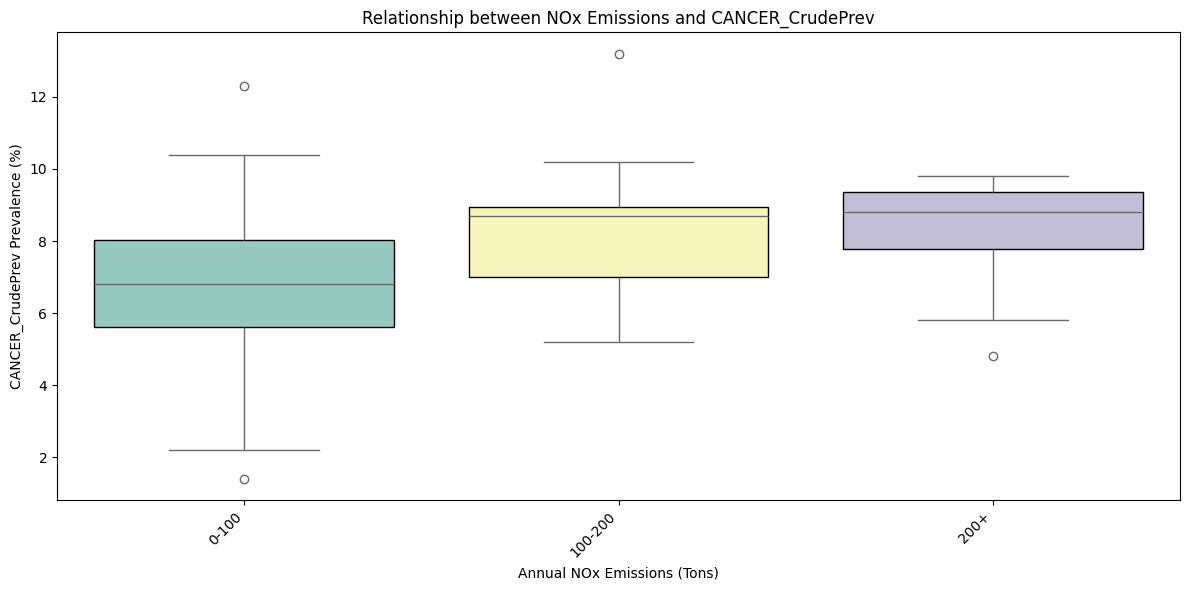

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


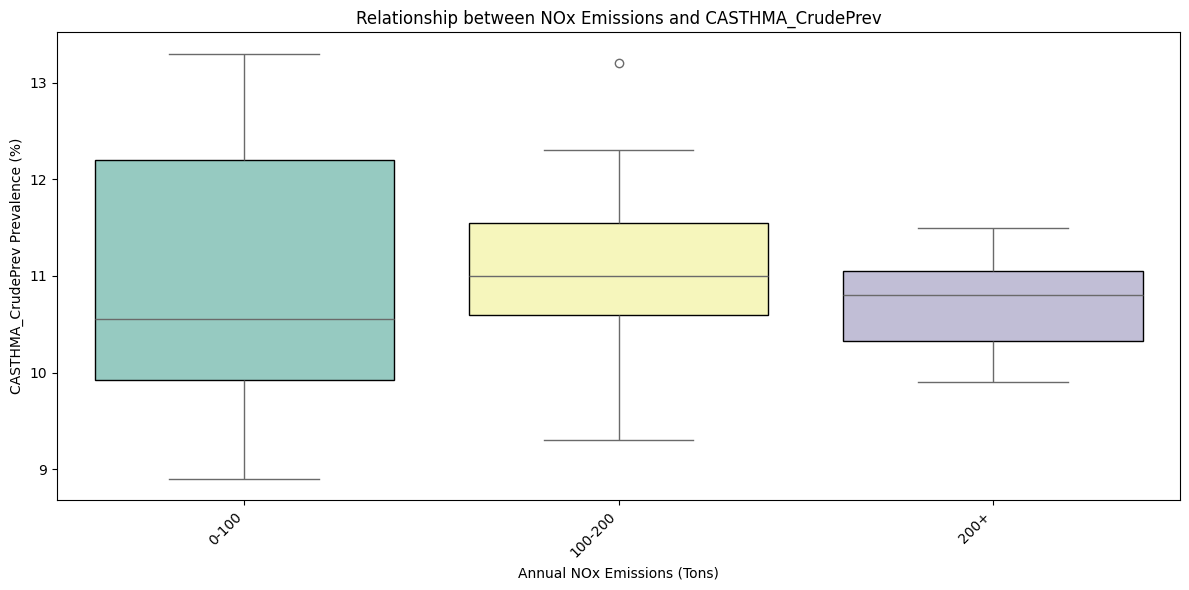

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


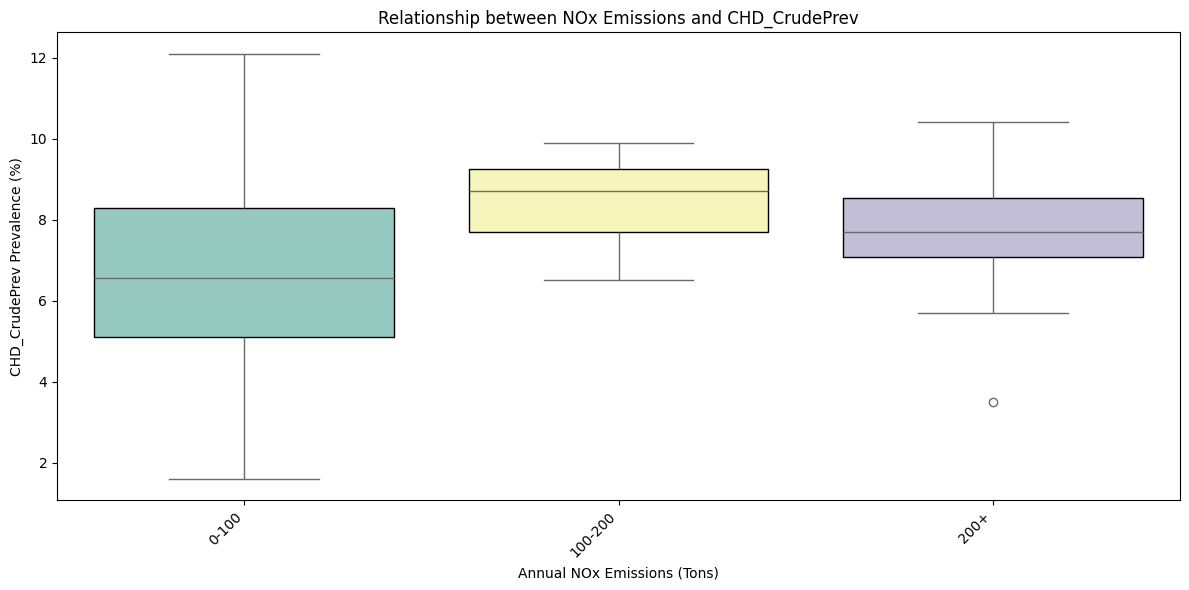

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


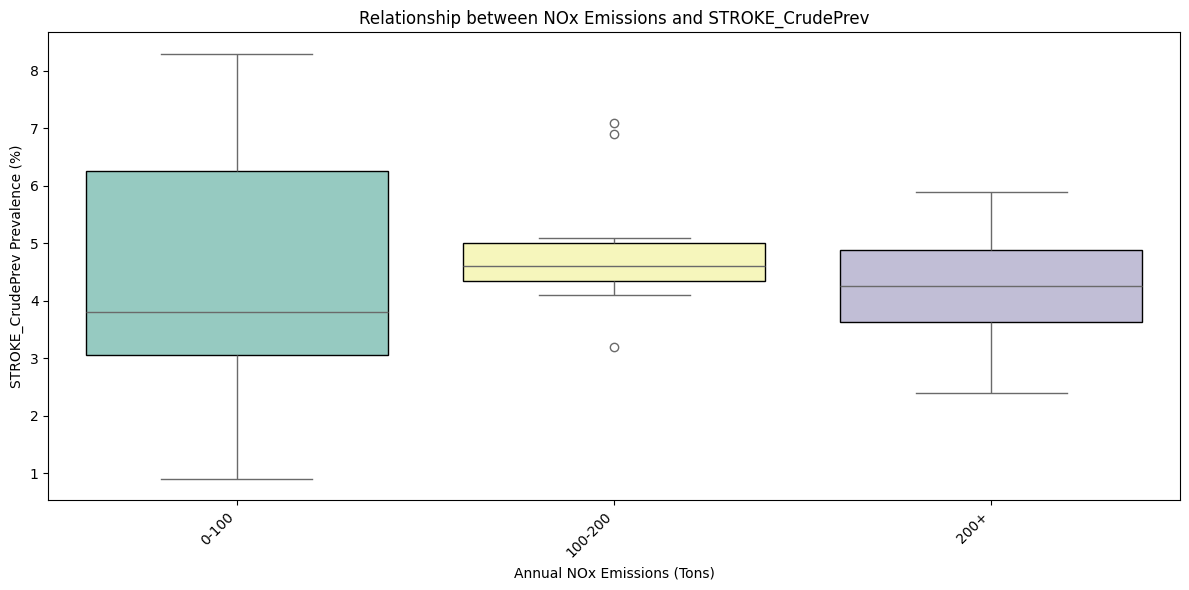

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


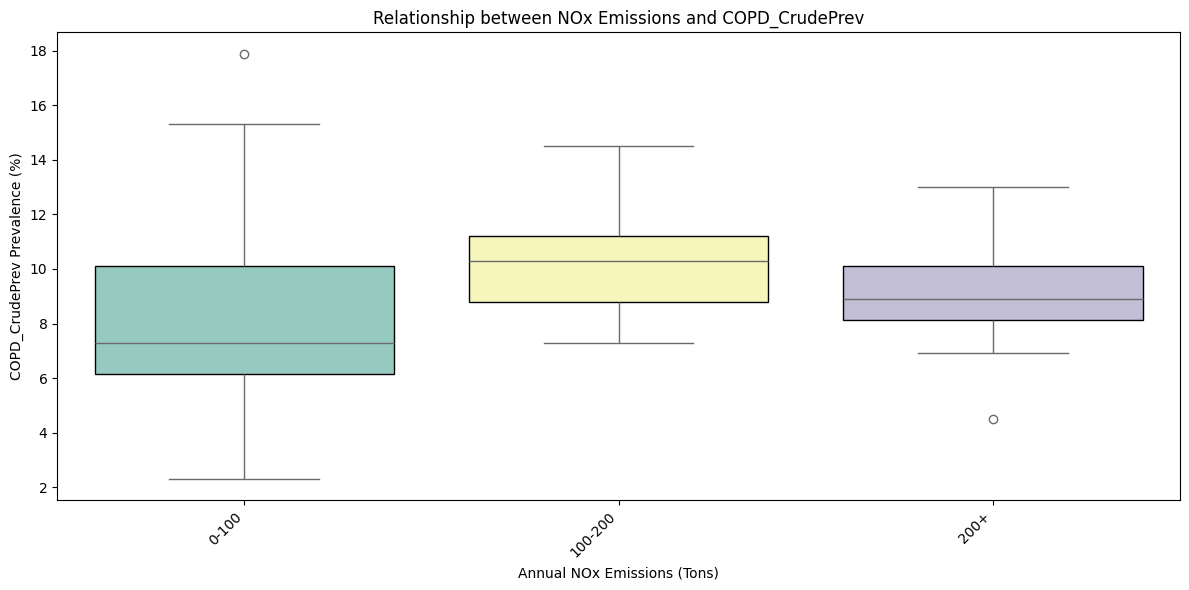

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


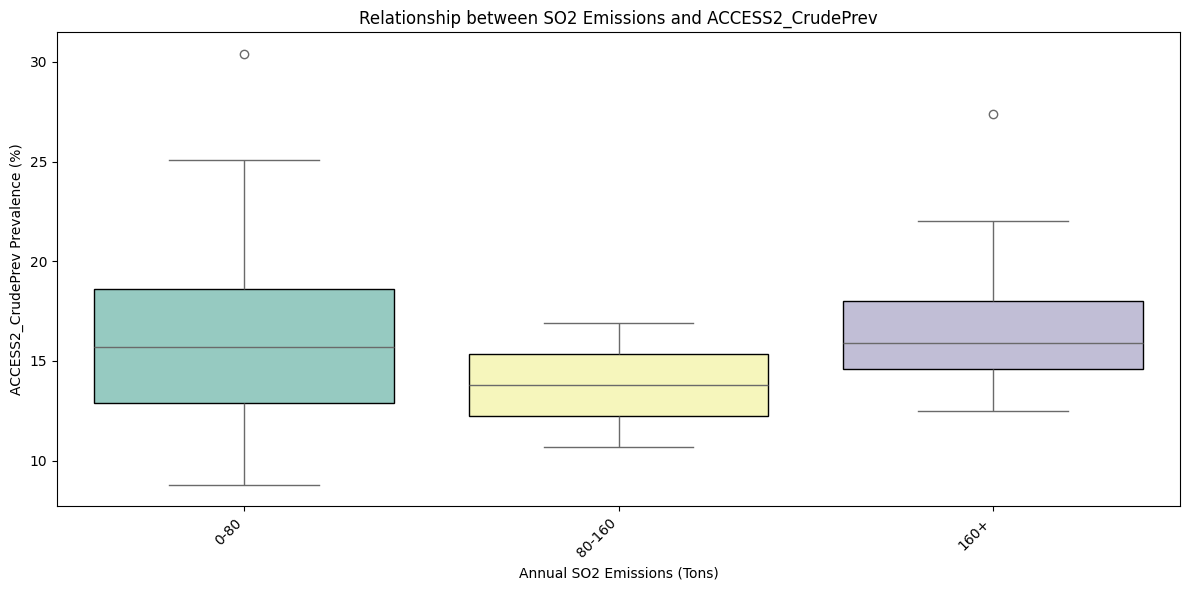

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


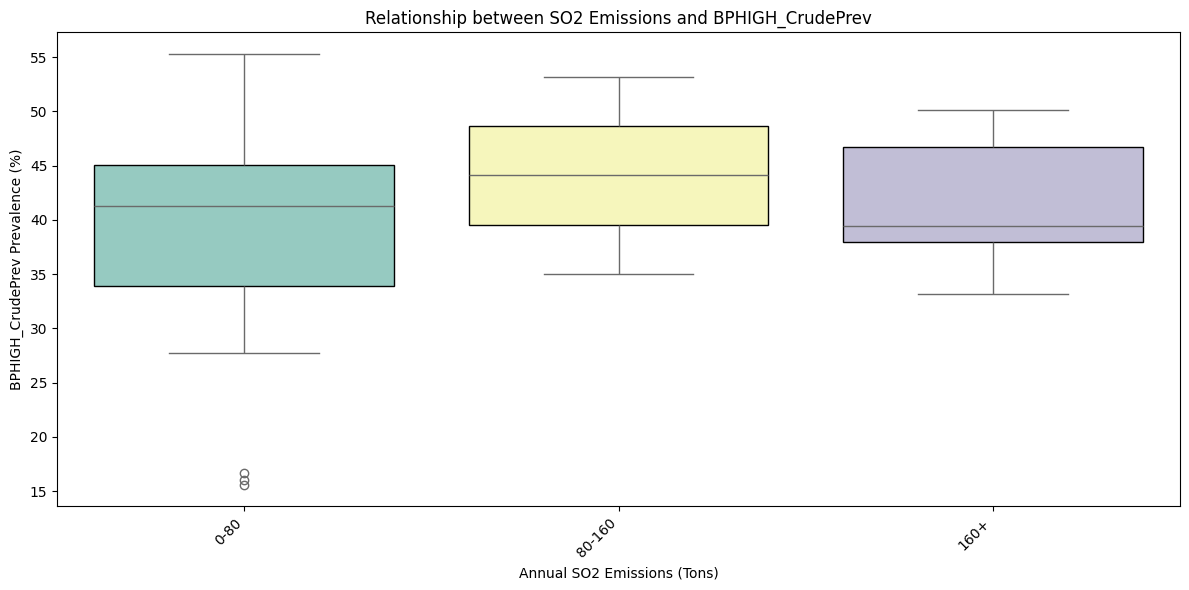

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


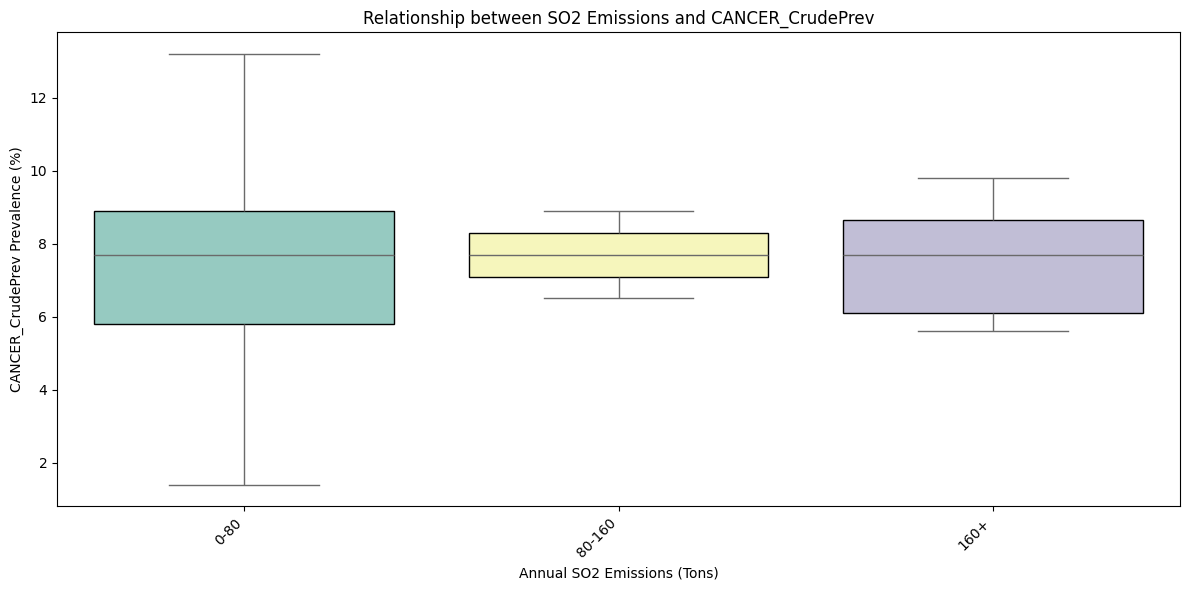

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


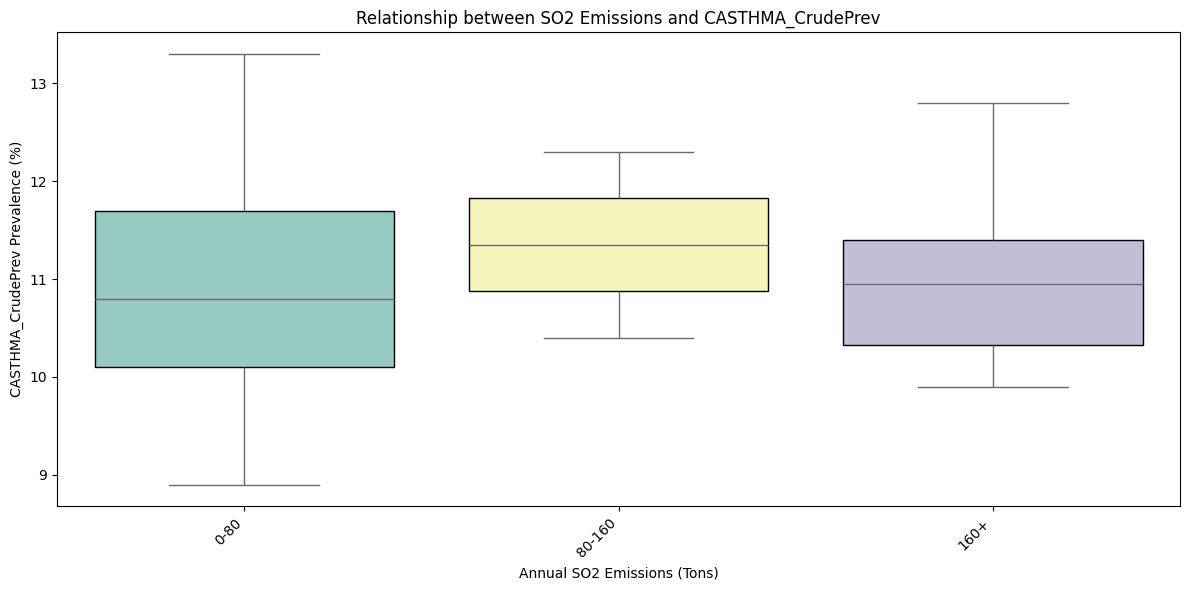

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


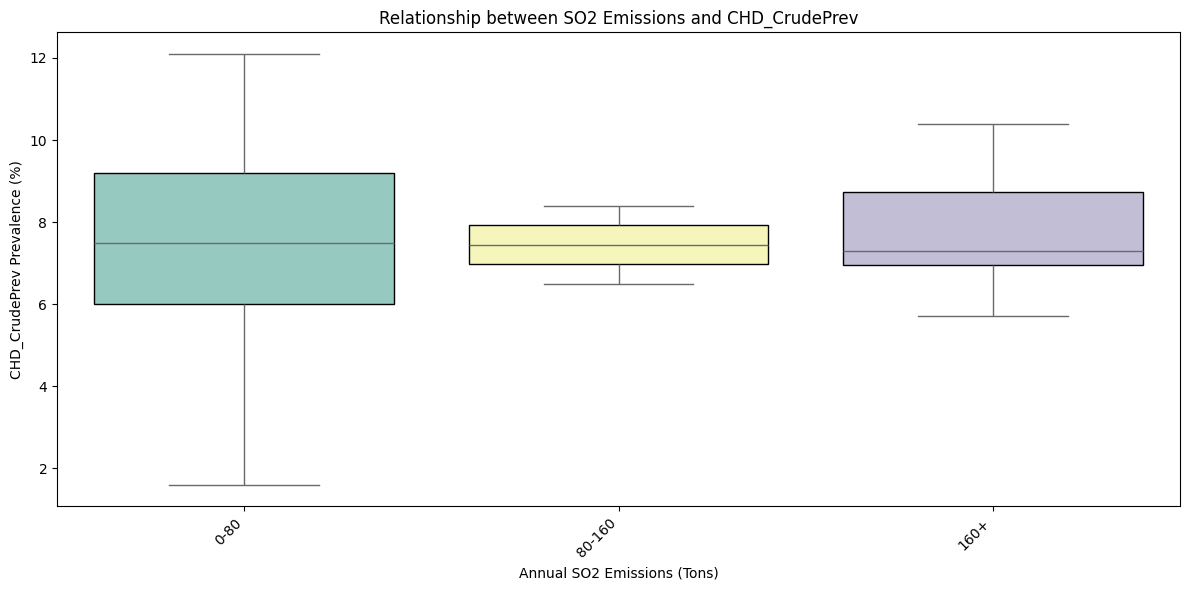

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


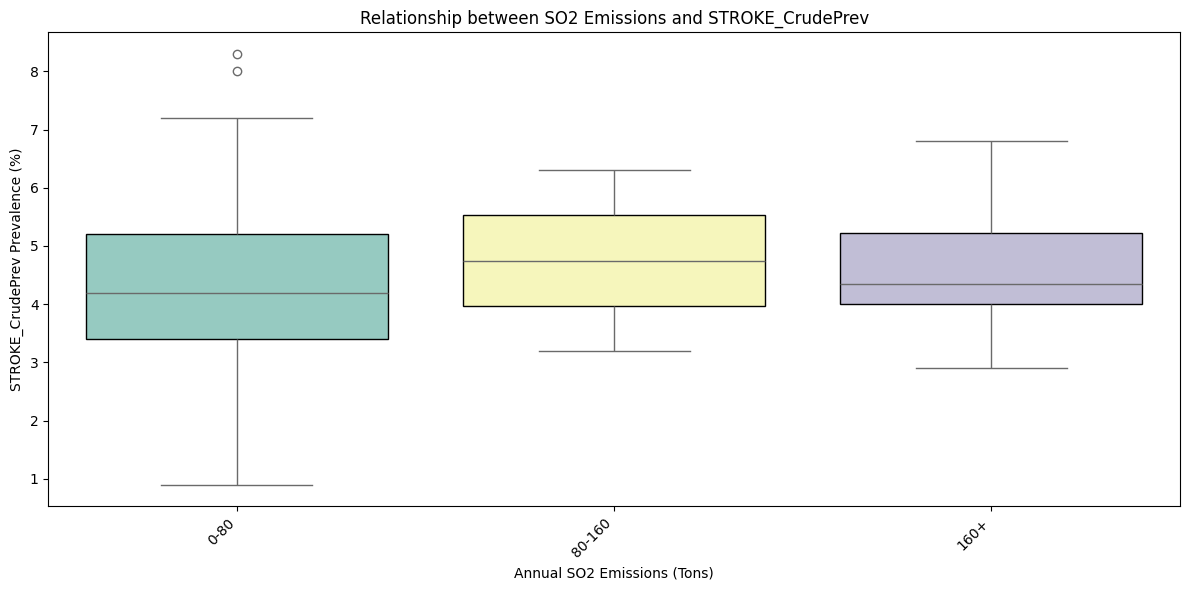

C:\Users\kaavy\AppData\Local\Temp\ipykernel_15292\1702312571.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


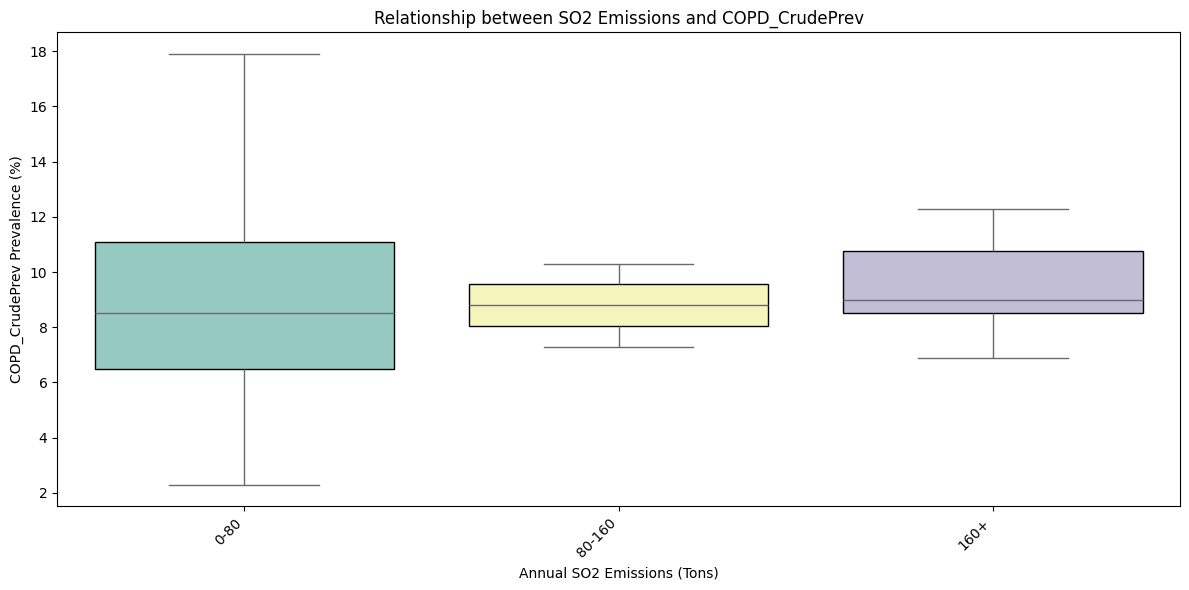

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add health condition data to melted_df
health_columns = ['ACCESS2_CrudePrev', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 
                  'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'COPD_CrudePrev']

melted_df = merged_df2.melt(
    id_vars=['dominant'] + health_columns, 
    value_vars=emission_columns, 
    var_name='Emission Type', 
    value_name='Emission Value'
)


melted_df_co2 = melted_df[melted_df['Emission Type'].str.contains('CO2')].copy()
melted_df_nox_so2 = melted_df[melted_df['Emission Type'].str.contains('NOx|SO2')].copy()

# Define bins and labels for CO2 emissions
co2_bins = [0, 1000, 10000, 50000, 100000, 500000,melted_df_co2['Emission Value'].max()]
co2_labels = ['0-1k', '1k-10k', '10k-50k', '50k-100k', '100k-500k', '500k+']

# Define bins and labels for NOx emissions
nox_bins = [0, 100, 200, melted_df_nox_so2['Emission Value'].max()]
nox_labels = ['0-100', '100-200', '200+']

# Define bins and labels for SO2 emissions
so2_bins = [0,80, 160, melted_df_nox_so2['Emission Value'].max()]
so2_labels = ['0-80', '80-160', '160+']



# Assign bins for CO2 emissions
melted_df_co2['Emission Bin'] = pd.cut(
    melted_df_co2['Emission Value'],
    bins=co2_bins,
    labels=co2_labels,
    include_lowest=True
)

# Assign bins for NOx emissions
melted_df_nox = melted_df_nox_so2[melted_df_nox_so2['Emission Type'].str.contains('NOx')].copy()
melted_df_nox['Emission Bin'] = pd.cut(
    melted_df_nox['Emission Value'],
    bins=nox_bins,
    labels=nox_labels,
    include_lowest=True
)

# Assign bins for SO2 emissions
melted_df_so2 = melted_df_nox_so2[melted_df_nox_so2['Emission Type'].str.contains('SO2')].copy()
melted_df_so2['Emission Bin'] = pd.cut(
    melted_df_so2['Emission Value'],
    bins=so2_bins,
    labels=so2_labels,
    include_lowest=True
)


# List of health conditions
health_conditions = ['ACCESS2_CrudePrev', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 
                     'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'STROKE_CrudePrev', 'COPD_CrudePrev']


# Create box plots for CO2 emissions
for health_condition in health_conditions:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Emission Bin',
        y=health_condition,
        data=melted_df_co2,
        palette='Set3',
        boxprops=dict(edgecolor='black')
    )
    plt.title(f"Relationship between CO2 Emissions and {health_condition}")
    plt.xlabel("Annual CO2 Emissions (Tons)")
    plt.ylabel(f"{health_condition} Prevalence (%)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create box plots for NOx emissions
for health_condition in health_conditions:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Emission Bin',
        y=health_condition,
        data=melted_df_nox,
        palette='Set3',
        boxprops=dict(edgecolor='black')
    )
    plt.title(f"Relationship between NOx Emissions and {health_condition}")
    plt.xlabel("Annual NOx Emissions (Tons)")
    plt.ylabel(f"{health_condition} Prevalence (%)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create box plots for SO2 emissions
for health_condition in health_conditions:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Emission Bin',
        y=health_condition,
        data=melted_df_so2,
        palette='Set3',
        boxprops=dict(edgecolor='black')
    )
    plt.title(f"Relationship between SO2 Emissions and {health_condition}")
    plt.xlabel("Annual SO2 Emissions (Tons)")
    plt.ylabel(f"{health_condition} Prevalence (%)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()